# Liberaries

In [1296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


# import zomato dataset

In [1297]:
df=pd.read_csv("zomato.csv")

# EDA

In [1298]:
df.head(10)

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   
5  https://www.zomato.com/bangalore/timepass-dinn...   
6  https://www.zomato.com/bangalore/rosewood-inte...   
7  https://www.zomato.com/bangalore/onesta-banash...   
8  https://www.zomato.com/bangalore/penthouse-caf...   
9  https://www.zomato.com/bangalore/smacznego-ban...   

                                             address  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2  1112, Next to KIMS Medical College, 17th Cross...   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5  37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6  19/1, New Timberyard Layout, Beside Satellite ...   
7  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
8  1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
9  2470, 21 Main Road, 25th Cross, Banashankari, ...   

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes                             phone      location  \
0  4.1/5    775    080 42297555\r\n+91 9743772233  Banashankari   
1  4.1/5    787                      080 41714161  Banashankari   
2  3.8/5    918                    +91 9663487993  Banashankari   
3  3.7/5     88                    +91 9620009302  Banashankari   
4  3.8/5    166  +91 8026612447\r\n+91 9901210005  Basavanagudi   
5  3.8/5    286  +91 9980040002\r\n+91 9980063005  Basavanagudi   
6  3.6/5      8    +91 9731716688\r\n080 26740366   Mysore Road   
7  4.6/5   2556      080 48653961\r\n080 48655715  Banashankari   
8  4.0/5    324  +91 8884135549\r\n+91 9449449316  Banashankari   
9  4.2/5    504  +91 9945230807\r\n+91 9743804471  Banashankari   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   
5        Casual Dining  Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...   
6        Casual Dining                                                NaN   
7  Casual Dining, Cafe  Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
8                 Cafe  Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   
9                 Cafe  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   

                                      cuisines approx_cost(for two people)  \
0               North Indian, Mughlai, Chinese                         800   
1                  Chinese, North Indian, Thai                         800   
2                       Cafe, Mexican, Italian                         800   
3                   South Indian, North Indian            

In [1299]:
df.shape

(51717, 17)

In [1300]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [1301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [1302]:
df.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

In [1303]:
df.describe(include="O")

url        address  \
count                                               51717          51717   
unique                                              51717          11495   
top     https://www.zomato.com/bangalore/the-nest-the-...  Delivery Only   
freq                                                    1            128   

                   name online_order book_table   rate         phone location  \
count             51717        51717      51717  43942         50509    51696   
unique             8792            2          2     64         14926       93   
top     Cafe Coffee Day          Yes         No    NEW  080 43334321      BTM   
freq                 96        30444      45268   2208           216     5124   

          rest_type dish_liked      cuisines approx_cost(for two people)  \
count         51490      23639         51672                       51371   
unique           93       5271          2723                          70   
top     Quick Bites    Biryani  North Indian                         300   
freq          19132        182          2913                        7576   

       reviews_list menu_item listed_in(type) listed_in(city)  
count         51717     51717           51717           51717  
unique        22513      9098               7              30  
top              []        []        Delivery             BTM  
freq           7595     39617           25942            3279

In [1304]:
df.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [1305]:
df.isnull().mean()*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

# Cleaning 

## Adjust Columns names

In [1306]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [1307]:
df.rename(columns={"approx_cost(for two people)":"twos_cost","listed_in(type)":"listed_type","listed_in(city)":"listed_city"},inplace=True)

In [1308]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'twos_cost',
       'reviews_list', 'menu_item', 'listed_type', 'listed_city'],
      dtype='object')

## Adjust Columns Type

In [1309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           51717 non-null  object
 1   address       51717 non-null  object
 2   name          51717 non-null  object
 3   online_order  51717 non-null  object
 4   book_table    51717 non-null  object
 5   rate          43942 non-null  object
 6   votes         51717 non-null  int64 
 7   phone         50509 non-null  object
 8   location      51696 non-null  object
 9   rest_type     51490 non-null  object
 10  dish_liked    23639 non-null  object
 11  cuisines      51672 non-null  object
 12  twos_cost     51371 non-null  object
 13  reviews_list  51717 non-null  object
 14  menu_item     51717 non-null  object
 15  listed_type   51717 non-null  object
 16  listed_city   51717 non-null  object
dtypes: int64(1), object(16)
memory usage: 6.7+ MB


### 1.rate

In [1310]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [1311]:

def getrate(s):
  s=str(s).lstrip("[(/Rated '")
  st=s.split(',')
  s=st[0][:-1]+'/5'
  return s

rat=df.loc[(df['rate'].isnull()) & ((df['reviews_list'].notnull()) & (df['reviews_list']!='[]')),'reviews_list' ].map(getrate)
df.loc[rat.index,['rate']]=rat
df['rate']=df['rate'].apply(lambda j : np.nan if (j=='NEW') | (j=='-') | (j==np.nan) else float(str(j).strip().rstrip('/5').strip()))

In [1312]:

df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 1. , 2.6, 3.4, 5. , 2. , 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 3.5, 2.5, 4.5, 4.9, 2.1, 1.8])

In [1313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           51717 non-null  object 
 1   address       51717 non-null  object 
 2   name          51717 non-null  object 
 3   online_order  51717 non-null  object 
 4   book_table    51717 non-null  object 
 5   rate          44166 non-null  float64
 6   votes         51717 non-null  int64  
 7   phone         50509 non-null  object 
 8   location      51696 non-null  object 
 9   rest_type     51490 non-null  object 
 10  dish_liked    23639 non-null  object 
 11  cuisines      51672 non-null  object 
 12  twos_cost     51371 non-null  object 
 13  reviews_list  51717 non-null  object 
 14  menu_item     51717 non-null  object 
 15  listed_type   51717 non-null  object 
 16  listed_city   51717 non-null  object 
dtypes: float64(1), int64(1), object(15)
memory usage: 6.7+ MB


### 2.twos_cost

In [1314]:
df['twos_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [1315]:
df['twos_cost']=df['twos_cost'].apply(lambda j : np.nan if (j==np.nan) else float(str(j).strip().replace(',','')))

In [1316]:
df['twos_cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [1317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           51717 non-null  object 
 1   address       51717 non-null  object 
 2   name          51717 non-null  object 
 3   online_order  51717 non-null  object 
 4   book_table    51717 non-null  object 
 5   rate          44166 non-null  float64
 6   votes         51717 non-null  int64  
 7   phone         50509 non-null  object 
 8   location      51696 non-null  object 
 9   rest_type     51490 non-null  object 
 10  dish_liked    23639 non-null  object 
 11  cuisines      51672 non-null  object 
 12  twos_cost     51371 non-null  float64
 13  reviews_list  51717 non-null  object 
 14  menu_item     51717 non-null  object 
 15  listed_type   51717 non-null  object 
 16  listed_city   51717 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 6.7+ MB


## Check redundant Columns

In [1318]:
numircdata=df.select_dtypes(exclude="O")
numircdata.head()

rate  votes  twos_cost
0   4.1    775      800.0
1   4.1    787      800.0
2   3.8    918      800.0
3   3.7     88      300.0
4   3.8    166      600.0

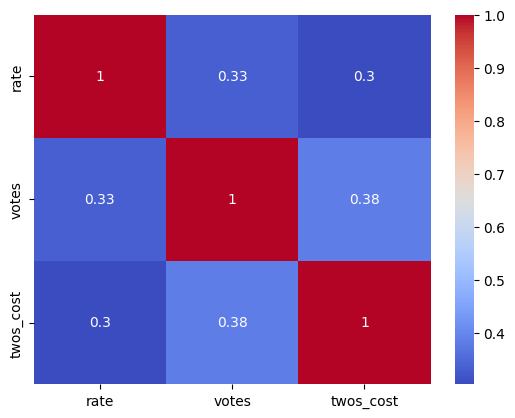

In [1319]:
corr=numircdata.corr()
sb.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

## Check Duplicates -- Drop If Found

In [1320]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, twos_cost, reviews_list, menu_item, listed_type, listed_city]
Index: []

In [1321]:
df.drop_duplicates(keep='first',inplace=True)

# EDA

In [1322]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  twos_cost  \
0  North Indian, Mughlai, Chinese      800.0   
1     Chinese, North Indian, Thai      800.0   
2          Cafe, Mexican, Italian      800.0   
3      South Indian, North Indian      300.0   
4        North Indian, Rajasthani      600.0   

                                        reviews_list menu_item listed_type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []      Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []      Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []      Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []      Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []      Buffet   

    listed_city  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

In [1323]:
df.shape

(51717, 17)

In [1324]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'twos_cost',
       'reviews_list', 'menu_item', 'listed_type', 'listed_city'],
      dtype='object')

In [1325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           51717 non-null  object 
 1   address       51717 non-null  object 
 2   name          51717 non-null  object 
 3   online_order  51717 non-null  object 
 4   book_table    51717 non-null  object 
 5   rate          44166 non-null  float64
 6   votes         51717 non-null  int64  
 7   phone         50509 non-null  object 
 8   location      51696 non-null  object 
 9   rest_type     51490 non-null  object 
 10  dish_liked    23639 non-null  object 
 11  cuisines      51672 non-null  object 
 12  twos_cost     51371 non-null  float64
 13  reviews_list  51717 non-null  object 
 14  menu_item     51717 non-null  object 
 15  listed_type   51717 non-null  object 
 16  listed_city   51717 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 6.7+ MB


In [1326]:
df.describe()

rate         votes     twos_cost
count  44166.000000  51717.000000  51371.000000
mean       3.658011    283.697527    555.431566
std        0.584186    803.838853    438.850728
min        1.000000      0.000000     40.000000
25%        3.300000      7.000000    300.000000
50%        3.700000     41.000000    400.000000
75%        4.000000    198.000000    650.000000
max        5.000000  16832.000000   6000.000000

In [1327]:
df.describe(include="O")

url        address  \
count                                               51717          51717   
unique                                              51717          11495   
top     https://www.zomato.com/bangalore/the-nest-the-...  Delivery Only   
freq                                                    1            128   

                   name online_order book_table         phone location  \
count             51717        51717      51717         50509    51696   
unique             8792            2          2         14926       93   
top     Cafe Coffee Day          Yes         No  080 43334321      BTM   
freq                 96        30444      45268           216     5124   

          rest_type dish_liked      cuisines reviews_list menu_item  \
count         51490      23639         51672        51717     51717   
unique           93       5271          2723        22513      9098   
top     Quick Bites    Biryani  North Indian           []        []   
freq          19132        182          2913         7595     39617   

       listed_type listed_city  
count        51717       51717  
unique           7          30  
top       Delivery         BTM  
freq         25942        3279

In [1328]:
df.nunique()

url             51717
address         11495
name             8792
online_order        2
book_table          2
rate               33
votes            2328
phone           14926
location           93
rest_type          93
dish_liked       5271
cuisines         2723
twos_cost          70
reviews_list    22513
menu_item        9098
listed_type         7
listed_city        30
dtype: int64

In [1329]:
df.isnull().mean()*100

url              0.000000
address          0.000000
name             0.000000
online_order     0.000000
book_table       0.000000
rate            14.600615
votes            0.000000
phone            2.335789
location         0.040606
rest_type        0.438927
dish_liked      54.291626
cuisines         0.087012
twos_cost        0.669026
reviews_list     0.000000
menu_item        0.000000
listed_type      0.000000
listed_city      0.000000
dtype: float64

## Univariat Analysis

### 1.online_order

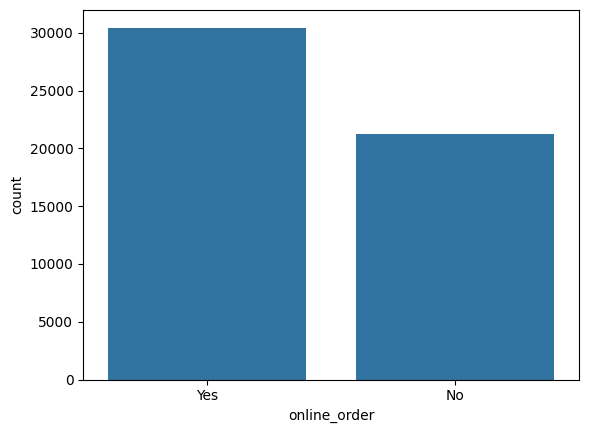

In [1330]:
sb.countplot(x='online_order',data=df)
plt.show()

### 2.book_table

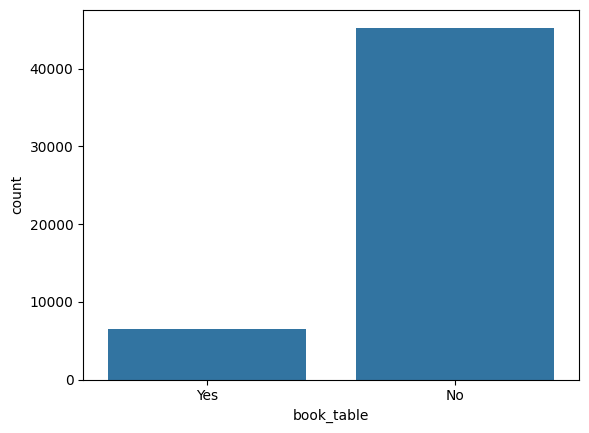

In [1331]:
sb.countplot(x='book_table',data=df)
plt.show()

### 3.rate

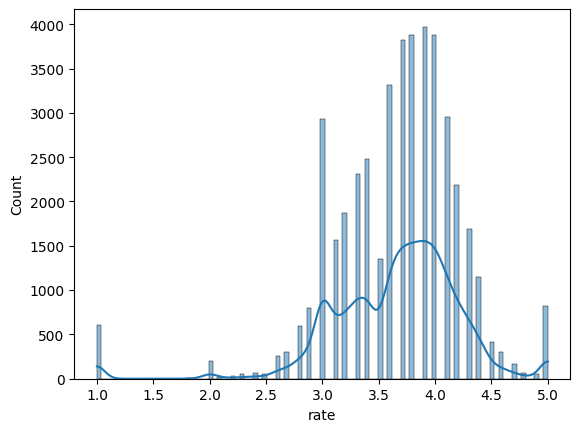

In [1332]:
sb.histplot(x='rate',data=df,kde=True)
plt.show()

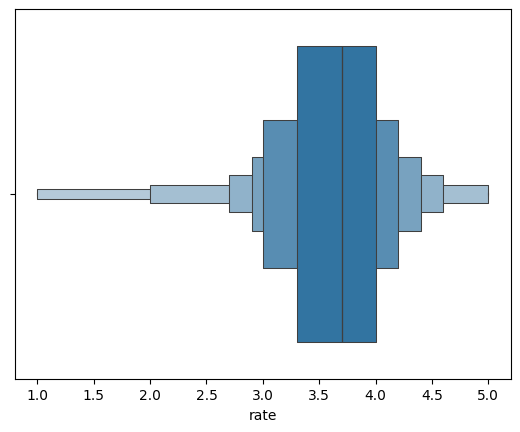

In [1333]:
sb.boxenplot(x='rate',data=df)
plt.show()

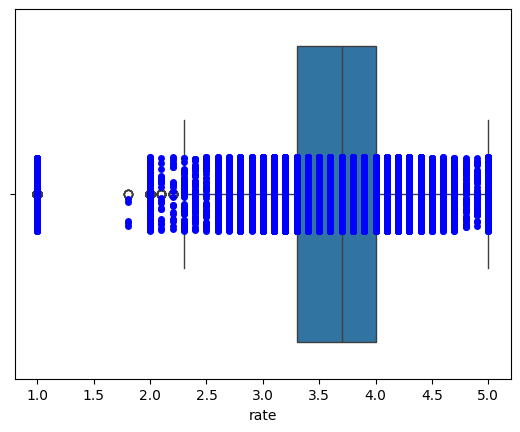

In [1334]:
sb.boxplot(x='rate',data=df)
sb.stripplot(x='rate',data=df,color='blue')
plt.show()

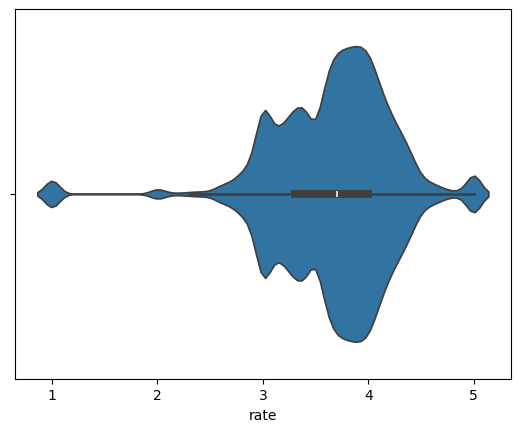

In [1335]:
sb.violinplot(x='rate',data=df)
plt.show()

### 4.votes

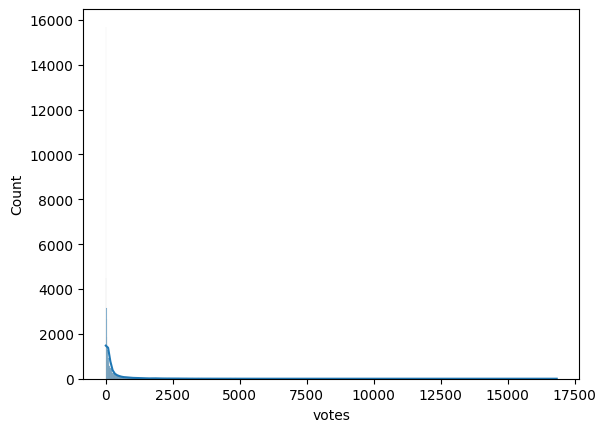

In [1336]:
sb.histplot(x='votes',data=df,kde=True)
plt.show()

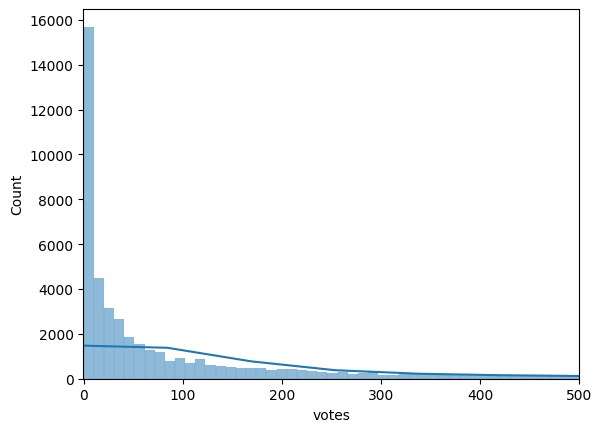

In [1337]:
sb.histplot(x='votes',data=df,kde=True)
plt.xlim(-.25,500)
plt.show()

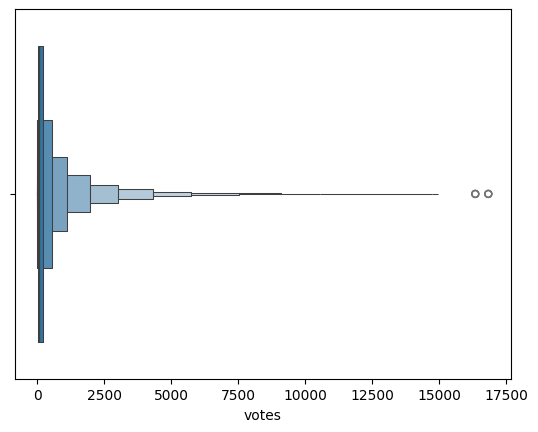

In [1338]:
sb.boxenplot(x='votes',data=df)
plt.show()

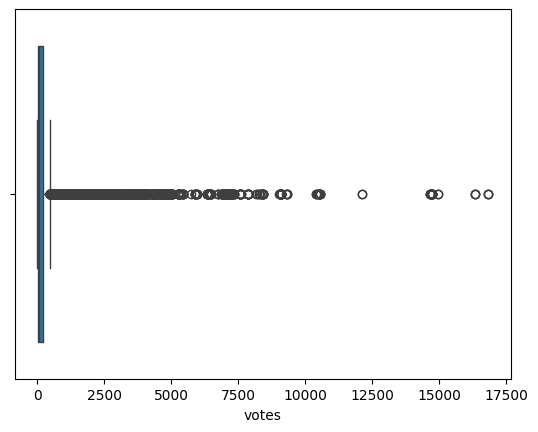

In [1339]:
sb.boxplot(x='votes',data=df)
plt.show()

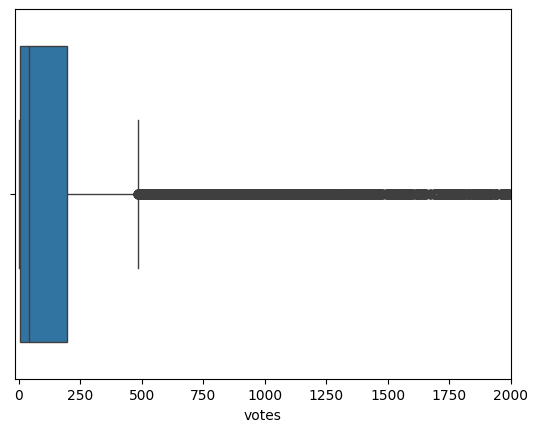

In [1340]:
sb.boxplot(x='votes',data=df)
plt.xlim(-15,2000)
#sb.stripplot(x='votes',data=df)
plt.show()

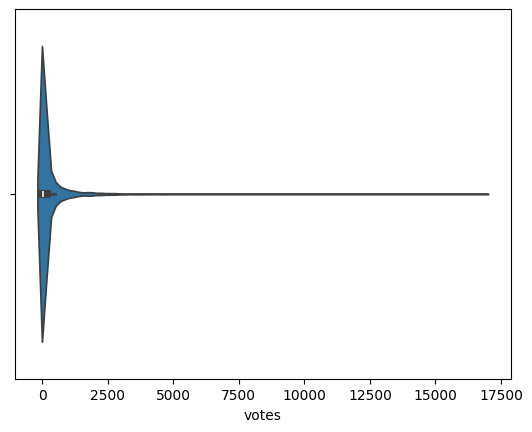

In [1341]:
sb.violinplot(x='votes',data=df)
plt.show()

### 5.location

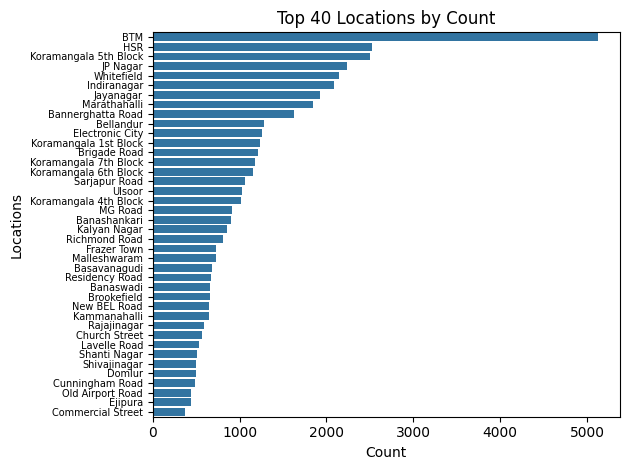

In [1342]:

# Get the top 40 locations by count
top_40 = df['location'].value_counts().nlargest(40).index

# Filter the dataset to include only the top 40 locations
filtered_df = df[df['location'].isin(top_40)]

# Plot the count plot
sb.countplot(data=filtered_df, y='location', order=top_40)

# Customize the plot
plt.title('Top 40 Locations by Count')
plt.yticks(fontsize=7)
plt.xlabel('Count')
plt.ylabel('Locations')
plt.tight_layout()
plt.show()

### 6.rest_type

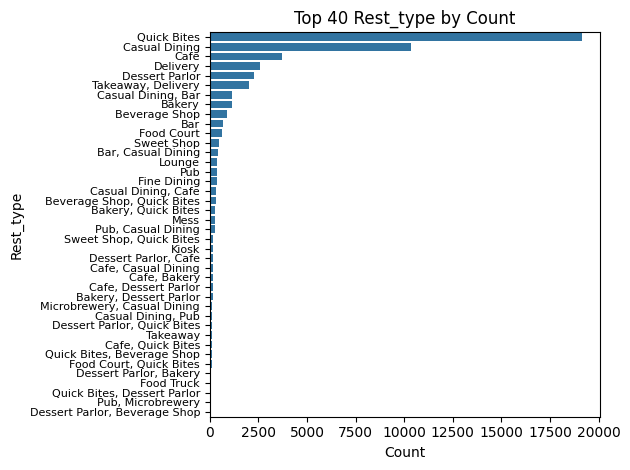

In [1343]:
top_40_rest=df['rest_type'].value_counts().nlargest(40).index

top_40rst_data=df[df['rest_type'].isin(top_40_rest)]

sb.countplot(y='rest_type',data=top_40rst_data,order=top_40_rest)
plt.title('Top 40 Rest_type by Count')
plt.yticks(fontsize=8)
plt.xlabel('Count')
plt.ylabel('Rest_type')
plt.tight_layout()
plt.show()

#### count rest_type for each resturant

In [1344]:
df.fillna({'rest_type':'missing'}, inplace=True)

In [1345]:
def get_count_of_rest_type(types):
    if (types != np.nan) & (types != 'missing') & (types != '') & (types != None):
        typeslst=str(types).split(',')
        typeslst=list(map(lambda x : x.strip(),typeslst))
        count_of_types=len(typeslst)
    else:
        count_of_types=0
    return count_of_types
count_types=df['rest_type'].apply(get_count_of_rest_type)

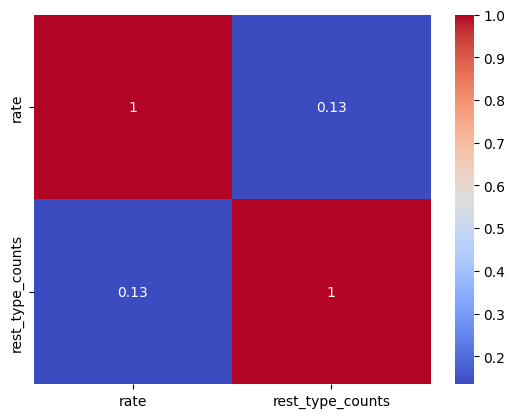

In [1346]:
dfrs_rt=pd.concat([df['rate'],count_types],axis=1)
dfrs_rt['rest_type_counts']=dfrs_rt['rest_type']
dfrs_rt.drop(columns='rest_type',inplace=True)
dfrs_rt.corr()
sb.heatmap(dfrs_rt.corr(),annot=True,cmap='coolwarm')
plt.show()

In [1347]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'twos_cost',
       'reviews_list', 'menu_item', 'listed_type', 'listed_city'],
      dtype='object')

### dish_liked

#### top dishes


In [1348]:
def get_dishes(lst_dishes):
    unique_dishes={}
    for dishes in lst_dishes:
        if (dishes != np.nan) & (dishes != 'nan') & (dishes != '') :
            disheslst=str(dishes).split(',')
            disheslst=list(map(lambda x : x.strip(),disheslst))
            for dish in disheslst :
                if  (dish in unique_dishes.keys()):
                    unique_dishes[dish]+=1
                elif ((dish != np.nan) & (dish != 'nan') & (dish != '')) & (dish not in unique_dishes.keys()) :
                    unique_dishes[dish]=1
    return unique_dishes

uni_dishes=get_dishes(df['dish_liked'])
sorted_uni_dishes=np.array(sorted(uni_dishes.items(),key=lambda x :x[1],reverse=True))
uni_dishes_counts=pd.DataFrame(data=sorted_uni_dishes,columns=['dish_liked','Count'])
uni_dishes_counts['Count']=uni_dishes_counts['Count'].astype(int)
uni_dishes_counts

dish_liked  Count
0                   Pasta   3409
1                 Burgers   3024
2               Cocktails   2832
3                   Pizza   2737
4                 Biryani   2092
...                   ...    ...
2787           Aloo Methi      1
2788         Burger Combo      1
2789    Chicken Stromboli      1
2790    Chicken Pepperoni      1
2791  Vegetable Dumplings      1

[2792 rows x 2 columns]

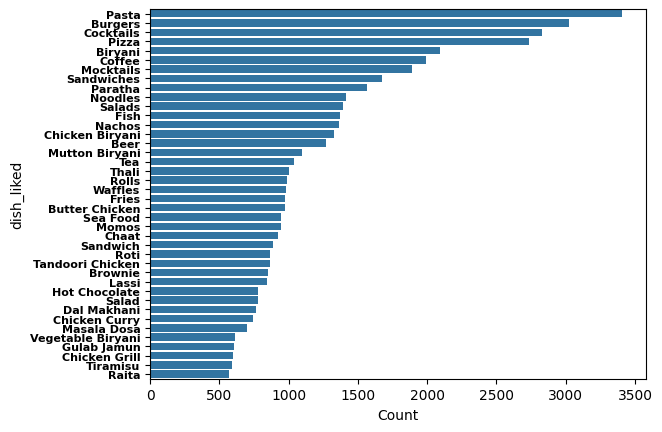

In [1349]:
sb.barplot(y='dish_liked',x='Count',data=uni_dishes_counts.iloc[0:40,:])
plt.yticks(fontsize=8,fontweight='bold')
plt.show()

#### count dishes liked for each resturant

In [1350]:
df.fillna({'dish_liked':'missing'}, inplace=True)

In [1351]:
def get_count_of_dishes(dishes):
    if (dishes != np.nan) & (dishes != 'missing') & (dishes != '') & (dishes != None):
        disheslst=str(dishes).split(',')
        disheslst=list(map(lambda x : x.strip(),disheslst))
        count_of_dishes=len(disheslst)
    else:
        count_of_dishes=0
    return count_of_dishes
count_dishes=df['dish_liked'].apply(get_count_of_dishes)

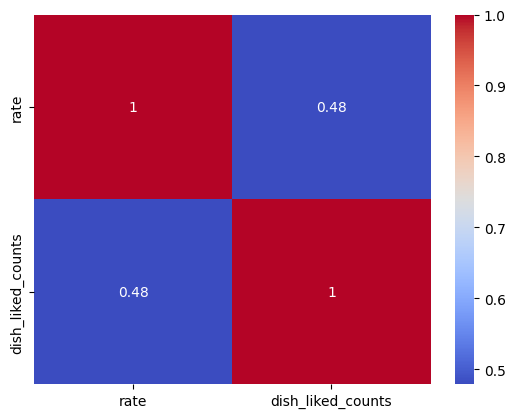

In [1352]:
dfdsh_rt=pd.concat([df['rate'],count_dishes],axis=1)
dfdsh_rt['dish_liked_counts']=dfdsh_rt['dish_liked']
dfdsh_rt.drop(columns='dish_liked',inplace=True)
dfdsh_rt.corr()
sb.heatmap(dfdsh_rt.corr(),annot=True,cmap='coolwarm')
plt.show() 

### 7.cuisines

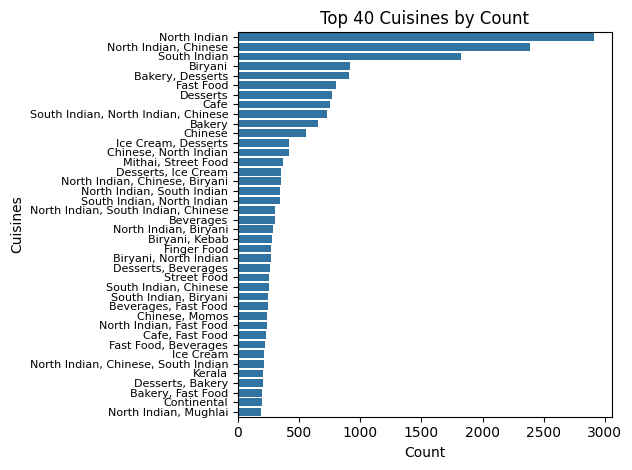

In [1353]:
top_40_cuis=df['cuisines'].value_counts().nlargest(40).index

top_40cuis_data=df[df['cuisines'].isin(top_40_cuis)]

sb.countplot(y='cuisines',data=top_40cuis_data,order=top_40_cuis)
plt.title('Top 40 Cuisines by Count')
plt.yticks(fontsize=8)
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.tight_layout()
plt.show()

In [1354]:
def get_cuisines(lst_cuisines):
    unique_cuisines={}
    for cuisines in lst_cuisines:
        if (cuisines != np.nan) & (cuisines != 'nan') & (cuisines != '') :
            cuisineslst=str(cuisines).split(',')
            cuisineslst=list(map(lambda x : x.strip(),cuisineslst))
            for cuisin in cuisineslst :
                if  (cuisin in unique_cuisines.keys()):
                    unique_cuisines[cuisin]+=1
                elif ((cuisin != np.nan) & (cuisin != 'nan') & (cuisin != '')) & (cuisin not in unique_cuisines.keys()) :
                    unique_cuisines[cuisin]=1
    return unique_cuisines

uni_cuisines=get_cuisines(df['cuisines'])
sorted_uni_cuisines=np.array(sorted(uni_cuisines.items(),key=lambda x :x[1],reverse=True))
uni_cuisines_counts=pd.DataFrame(data=sorted_uni_cuisines,columns=['cuisines','Count'])
uni_cuisines_counts['Count']=uni_cuisines_counts['Count'].astype(int)
print(uni_cuisines_counts)

         cuisines  Count
0    North Indian  21085
1         Chinese  15547
2    South Indian   8644
3       Fast Food   8096
4         Biryani   6492
..            ...    ...
102        Sindhi      4
103      Hot dogs      3
104     Pan Asian      3
105        Indian      2
106       Malwani      2

[107 rows x 2 columns]


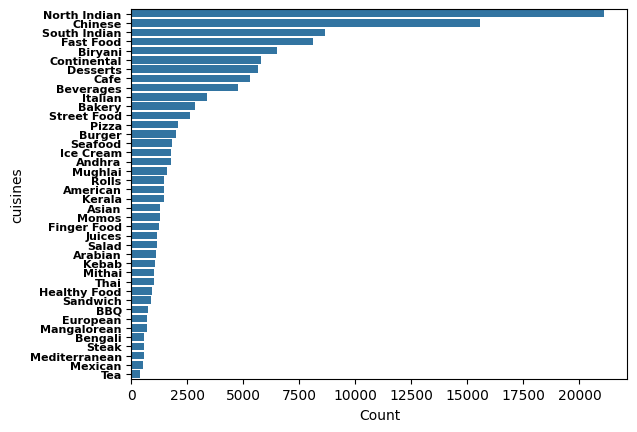

In [1355]:
sb.barplot(y='cuisines',x='Count',data=uni_cuisines_counts.iloc[0:40,:])
plt.yticks(fontsize=8,fontweight='bold')
plt.show()

#### count cuisines for each resturant

In [1356]:
df.fillna({'cuisines':'missing'}, inplace=True)

In [1357]:
def get_count_of_cuisines(cuisines):
   if (cuisines != np.nan) & (cuisines != 'missing') & (cuisines != '') & (cuisines != None):
      cuisineslst=str(cuisines).split(',')
      cuisineslst=list(map(lambda x : x.strip(),cuisineslst))
      count_of_cuisines=len(cuisineslst)
   else:
      count_of_cuisines=0
   return count_of_cuisines
count_cuisines=df['cuisines'].apply(get_count_of_cuisines)

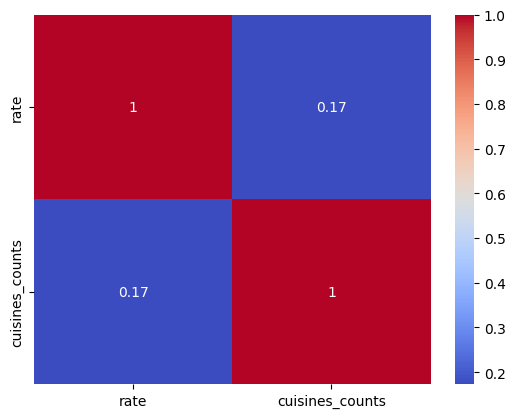

In [1358]:
dfcu_rt=pd.concat([df['rate'],count_cuisines],axis=1)
dfcu_rt['cuisines_counts']=dfcu_rt['cuisines']
dfcu_rt.drop(columns='cuisines',inplace=True)
dfcu_rt.corr()
sb.heatmap(dfcu_rt.corr(),annot=True,cmap='coolwarm')
plt.show()

### 8.twos_cost

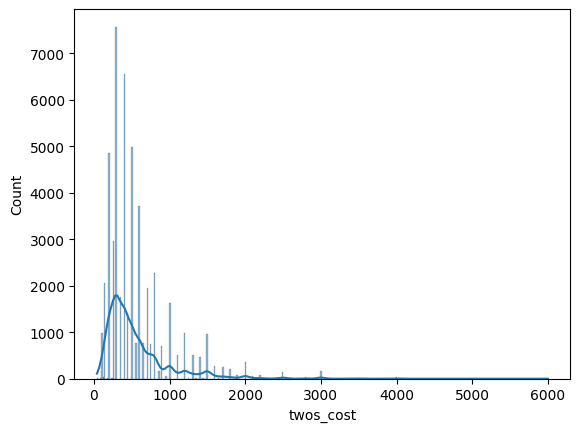

In [1359]:
sb.histplot(x='twos_cost',data=df,kde=True)
plt.show()

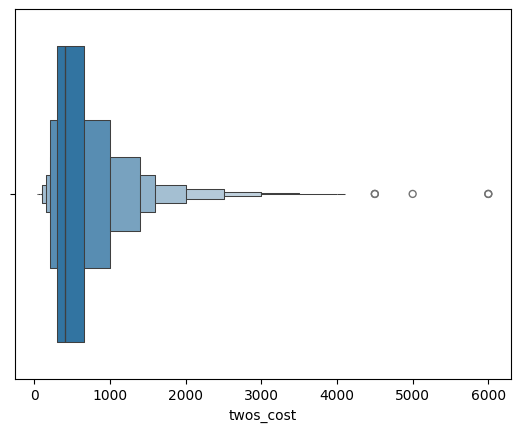

In [1360]:
sb.boxenplot(x='twos_cost',data=df)
plt.show()

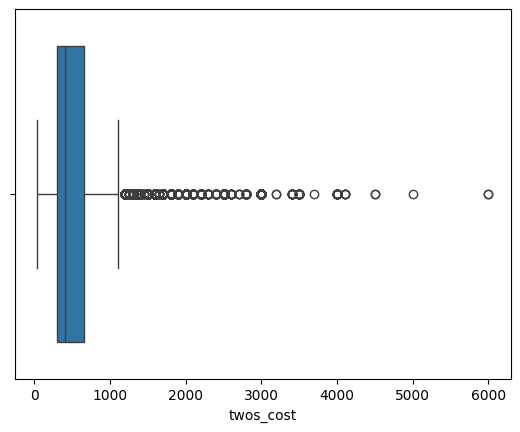

In [1361]:
sb.boxplot(x='twos_cost',data=df)
plt.show()

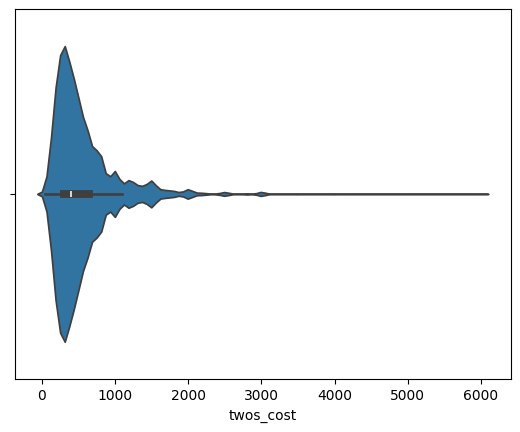

In [1362]:
sb.violinplot(x='twos_cost',data=df)
plt.show()

### 9.listed_type

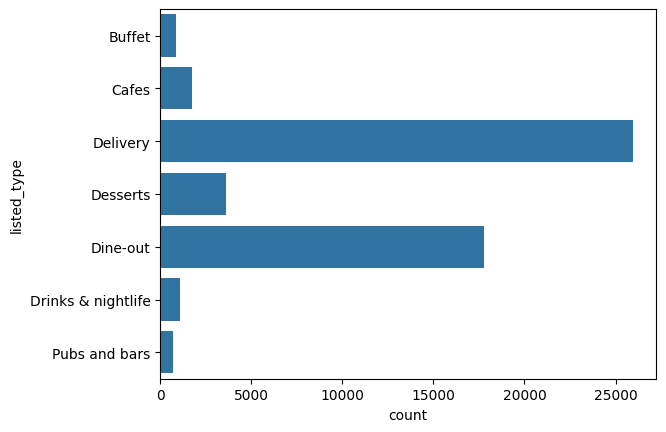

In [1363]:
sb.countplot(y='listed_type',data=df)
plt.show()

### 10.listed_city

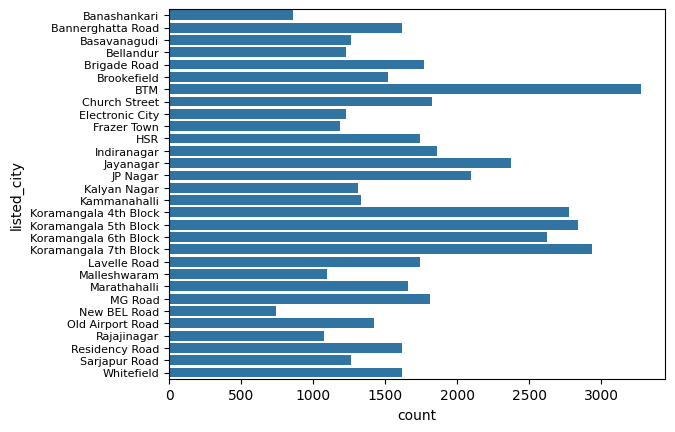

In [1364]:
sb.countplot(y='listed_city',data=df)
plt.yticks(fontsize=8)
plt.show()

## Bivariate Analysis

In [1365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           51717 non-null  object 
 1   address       51717 non-null  object 
 2   name          51717 non-null  object 
 3   online_order  51717 non-null  object 
 4   book_table    51717 non-null  object 
 5   rate          44166 non-null  float64
 6   votes         51717 non-null  int64  
 7   phone         50509 non-null  object 
 8   location      51696 non-null  object 
 9   rest_type     51717 non-null  object 
 10  dish_liked    51717 non-null  object 
 11  cuisines      51717 non-null  object 
 12  twos_cost     51371 non-null  float64
 13  reviews_list  51717 non-null  object 
 14  menu_item     51717 non-null  object 
 15  listed_type   51717 non-null  object 
 16  listed_city   51717 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 6.7+ MB


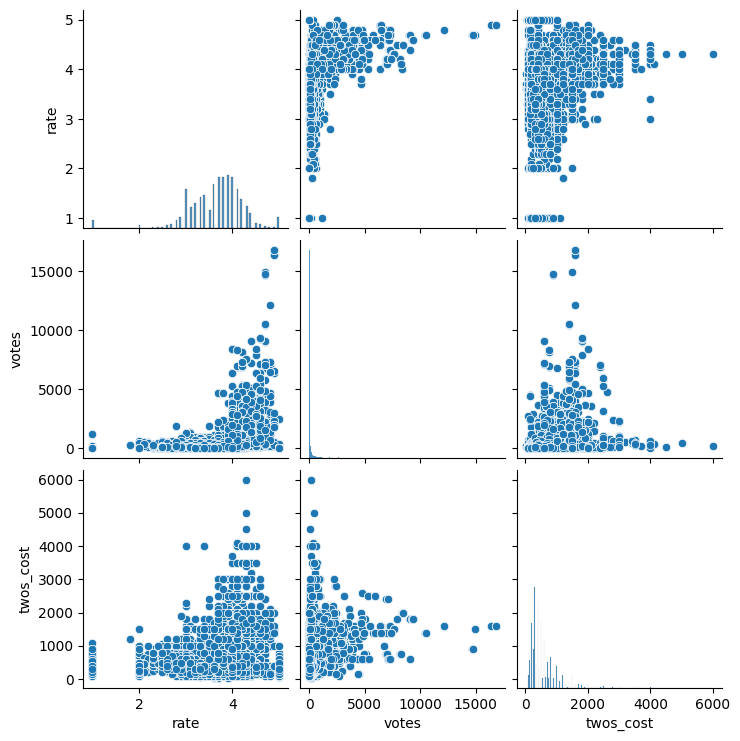

In [1366]:
sb.pairplot(df)
plt.show()

### 1.online_order

#### online_order & book_table

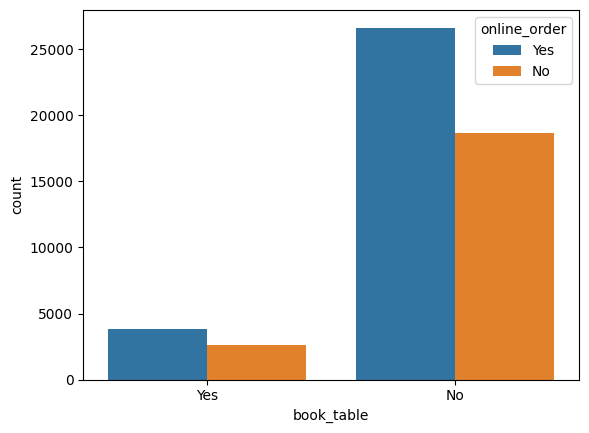

In [1367]:
sb.countplot(x='book_table',hue='online_order',data=df)
plt.show()

#### online_order & rate

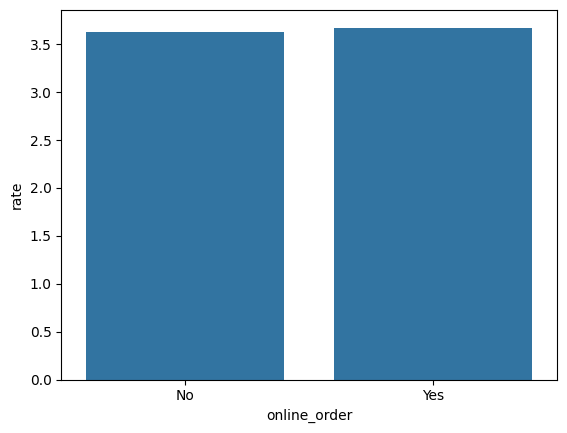

In [1368]:
online_order_rate=df.groupby('online_order')['rate'].mean()
sb.barplot(online_order_rate)
plt.show()

#### online_order & votes

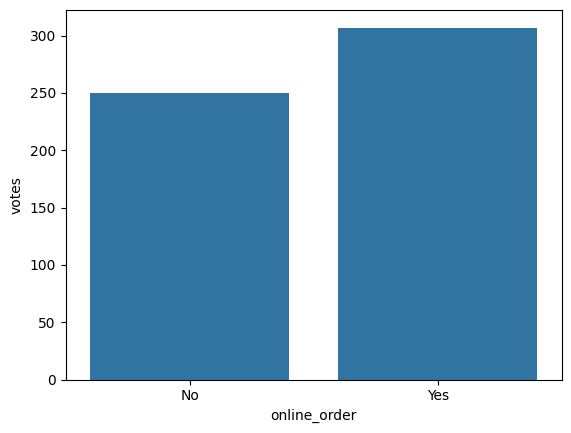

In [1369]:
online_order_votes=df.groupby('online_order')['votes'].mean()
sb.barplot(online_order_votes)
plt.show()

#### online_order & rest_type

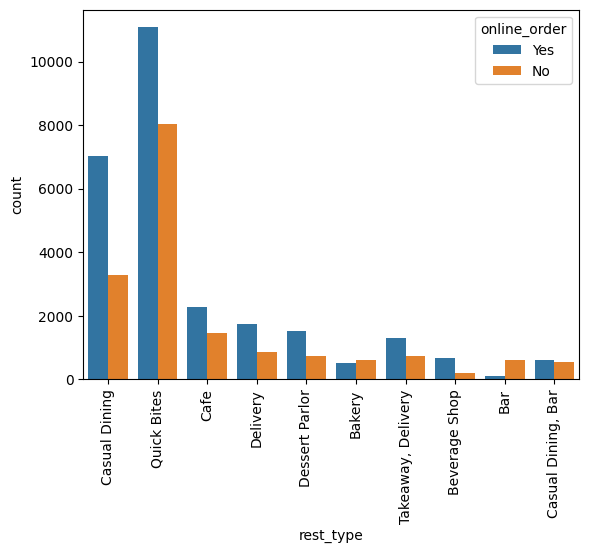

In [1370]:
top_10 = df['rest_type'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 
filtered_df = df[df['rest_type'].isin(top_10)]

sb.countplot(x='rest_type',hue='online_order',data=filtered_df)
plt.xticks(rotation=90)
plt.show()

#### online_order & cuisines

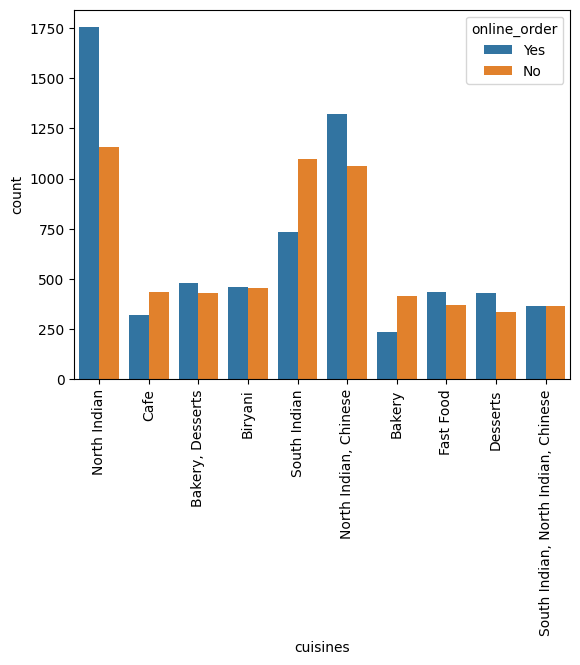

In [1371]:
top_10 = df['cuisines'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 
filtered_df = df[df['cuisines'].isin(top_10)]

sb.countplot(x='cuisines',hue='online_order',data=filtered_df)
plt.xticks(rotation=90)
plt.show()

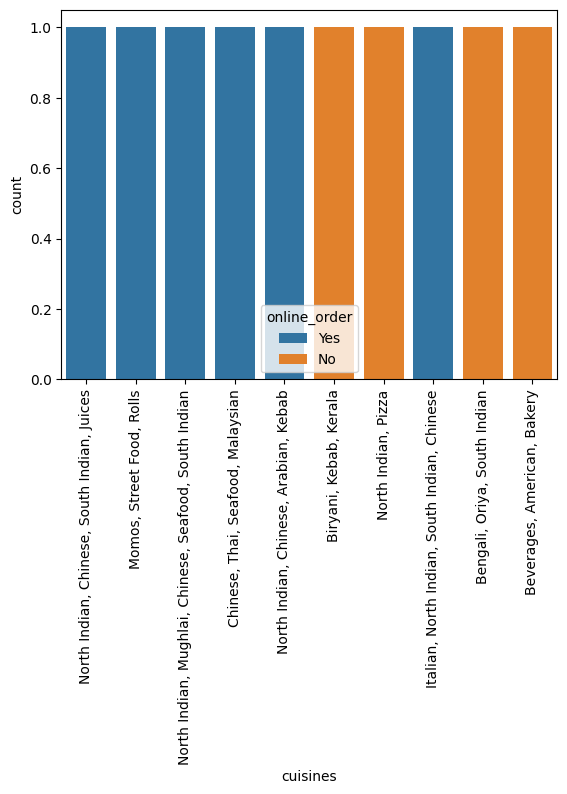

In [1372]:
bottom_10 = df['cuisines'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10
filtered_df = df[df['cuisines'].isin(bottom_10)]

sb.countplot(x='cuisines',hue='online_order',data=filtered_df)
plt.xticks(rotation=90)
plt.show()

#### online_order & twos_cost

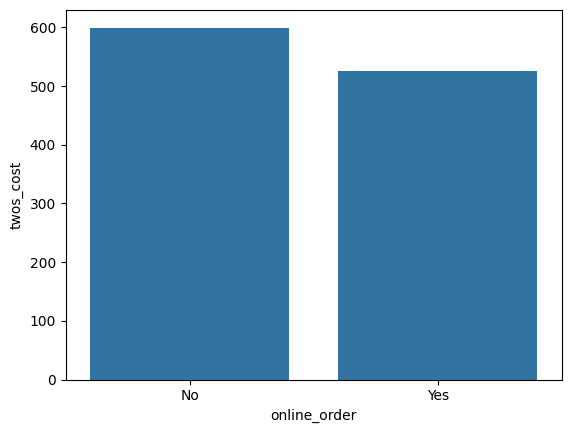

In [1373]:
online_order_two=df.groupby('online_order')['twos_cost'].mean()
sb.barplot(online_order_two)
plt.show()

#### online_order & listed_type

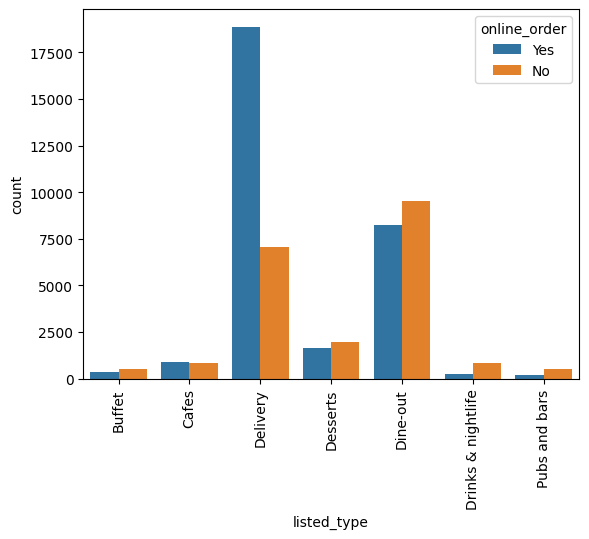

In [1374]:
sb.countplot(x='listed_type',hue='online_order',data=df)
plt.xticks(rotation=90)
plt.show()

#### online_order & listed_city

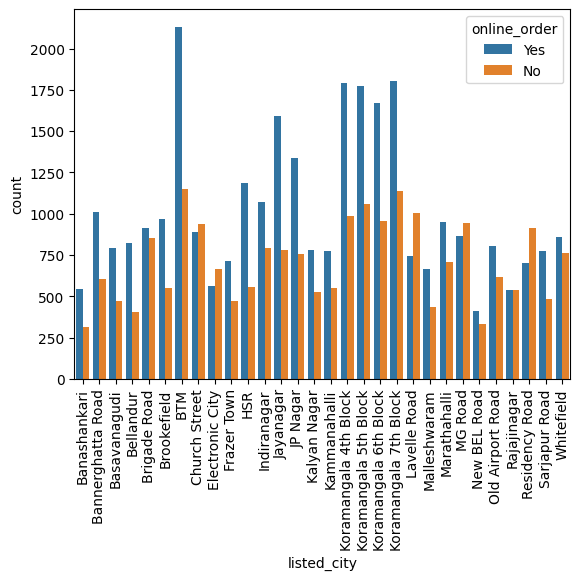

In [1375]:
sb.countplot(x='listed_city',hue='online_order',data=df)
plt.xticks(rotation=90)
plt.show()

#### online_order & location

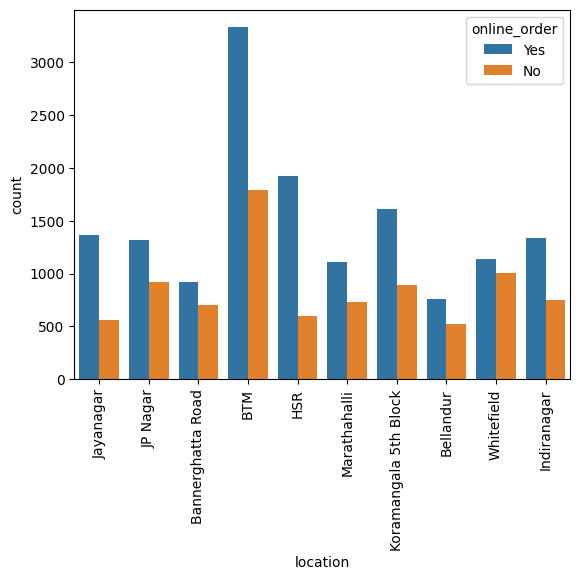

In [1376]:
# Get the top 10 locations by count
top_10 = df['location'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 locations
filtered_df = df[df['location'].isin(top_10)]


sb.countplot(x='location',hue='online_order',data=filtered_df)
plt.xticks(rotation=90)
plt.show()


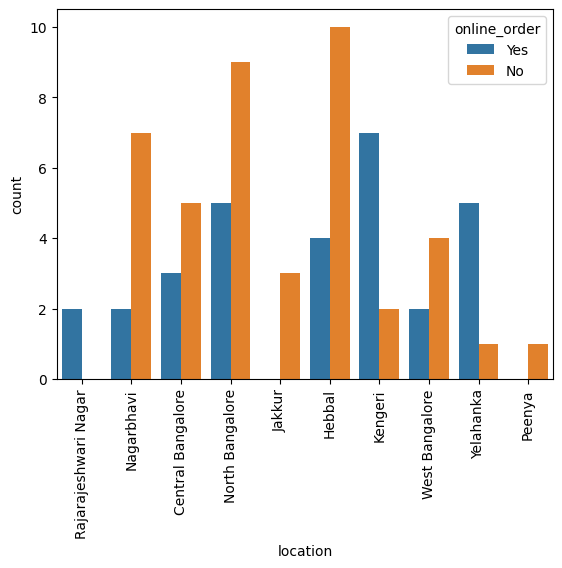

In [1377]:
# Get the bottom_10 locations by count
bottom_10 = df['location'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10 locations
filtered_df = df[df['location'].isin(bottom_10)]


sb.countplot(x='location',hue='online_order',data=filtered_df)
plt.xticks(rotation=90)
plt.show()

### 2.book_table

#### book_table & rate

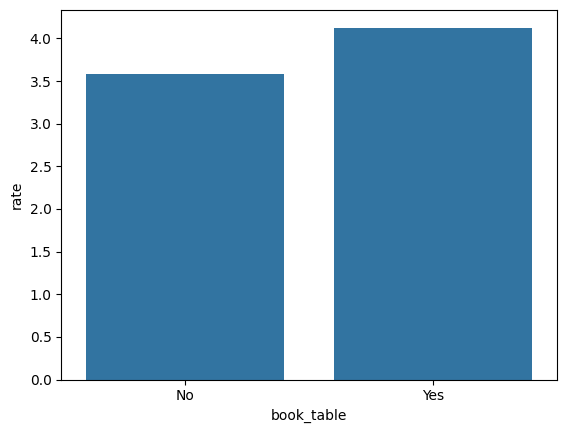

In [1378]:
book_table_rate=df.groupby('book_table')['rate'].mean()
sb.barplot(book_table_rate)
plt.show()

#### book_table & votes

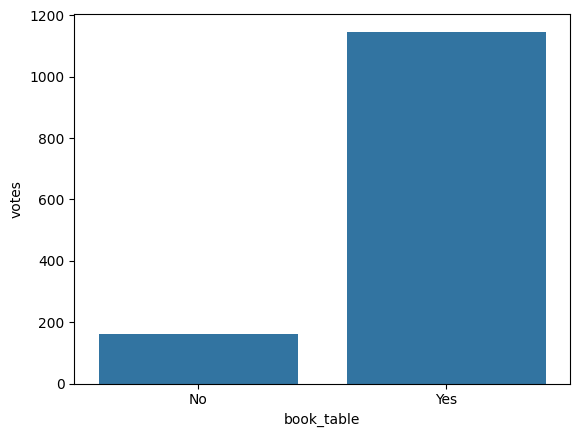

In [1379]:
book_table_votes=df.groupby('book_table')['votes'].mean()
sb.barplot(book_table_votes)
plt.show()

#### book_table & rest_type

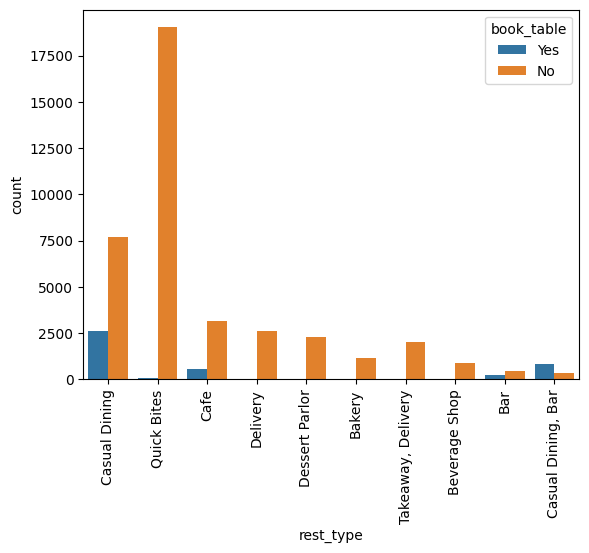

In [1380]:
top_10 = df['rest_type'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 
filtered_df = df[df['rest_type'].isin(top_10)]

sb.countplot(x='rest_type',hue='book_table',data=filtered_df)
plt.xticks(rotation=90)
plt.show()

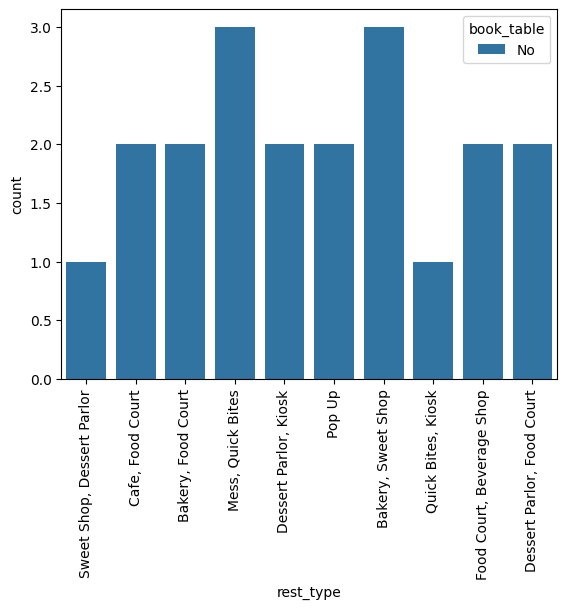

In [1381]:
bottom_10 = df['rest_type'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10
filtered_df = df[df['rest_type'].isin(bottom_10)]

sb.countplot(x='rest_type',hue='book_table',data=filtered_df)
plt.xticks(rotation=90)
plt.show()

#### book_table & location

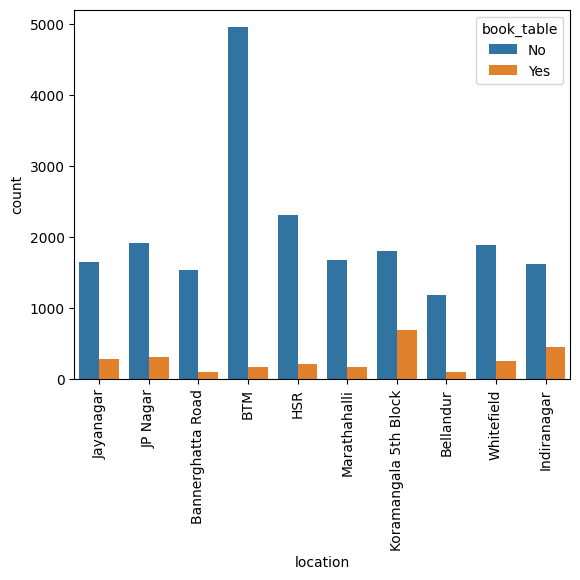

In [1382]:
# Get the top 10 locations by count
top_10 = df['location'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 locations
filtered_df = df[df['location'].isin(top_10)]


sb.countplot(x='location',hue='book_table',data=filtered_df)
plt.xticks(rotation=90)
plt.show()


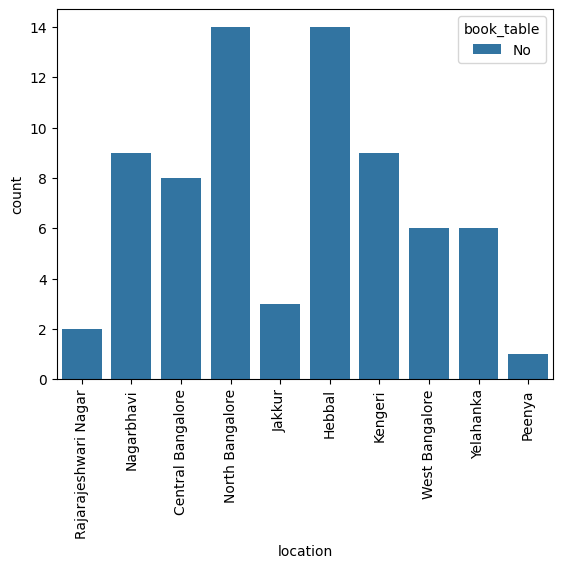

In [1383]:
# Get the bottom_10 locations by count
bottom_10 = df['location'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10 locations
filtered_df = df[df['location'].isin(bottom_10)]


sb.countplot(x='location',hue='book_table',data=filtered_df)
plt.xticks(rotation=90)
plt.show()

#### book_table & cuisines

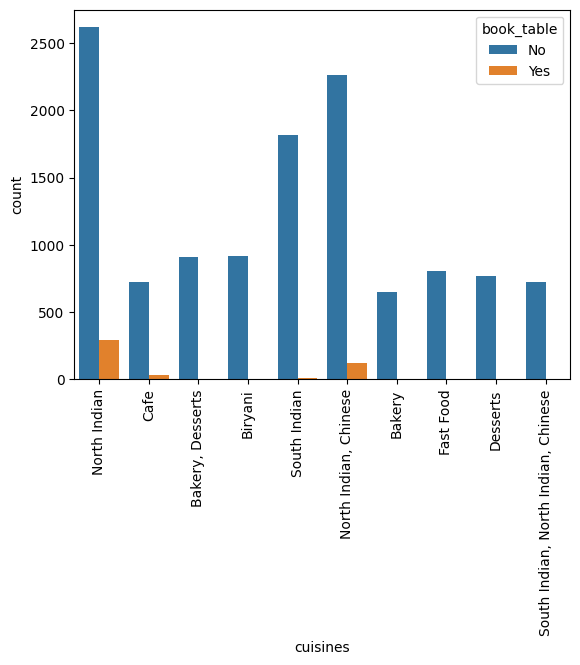

In [1384]:
top_10 = df['cuisines'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 
filtered_df = df[df['cuisines'].isin(top_10)]

sb.countplot(x='cuisines',hue='book_table',data=filtered_df)
plt.xticks(rotation=90)
plt.show()

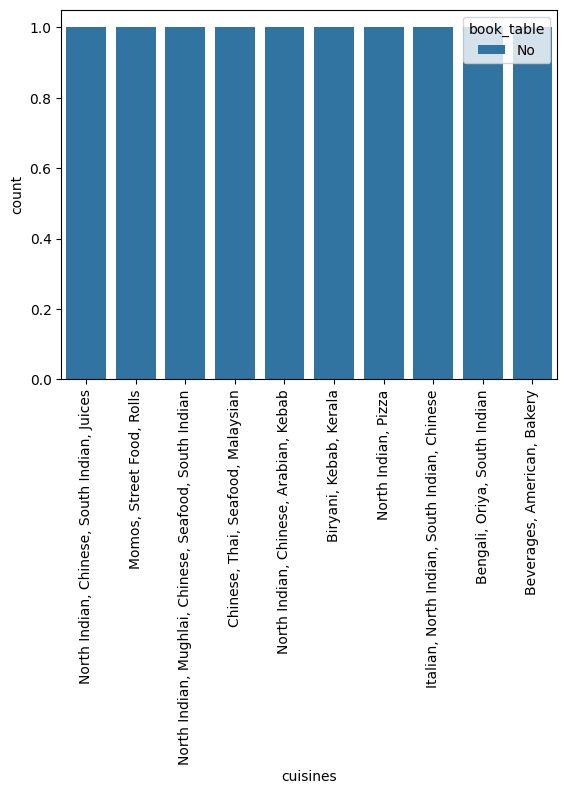

In [1385]:
bottom_10 = df['cuisines'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10 
filtered_df = df[df['cuisines'].isin(bottom_10)]

sb.countplot(x='cuisines',hue='book_table',data=filtered_df)
plt.xticks(rotation=90)
plt.show()

#### book_table & twos_cost

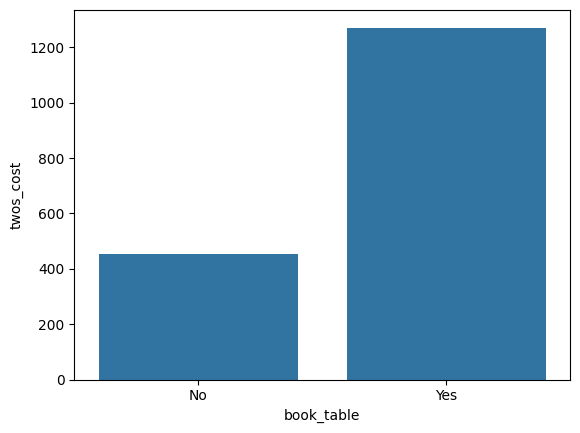

In [1386]:
book_table_two=df.groupby('book_table')['twos_cost'].mean()
sb.barplot(book_table_two)
plt.show()

#### book_table & listed_type

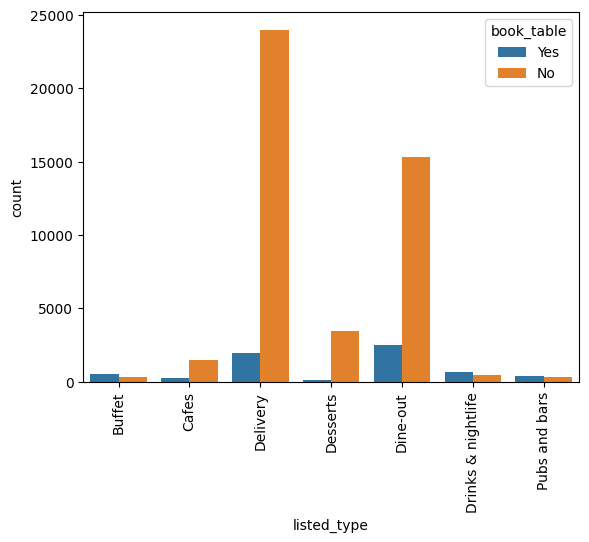

In [1387]:
sb.countplot(x='listed_type',hue='book_table',data=df)
plt.xticks(rotation=90)
plt.show()

#### book_table & listed_city

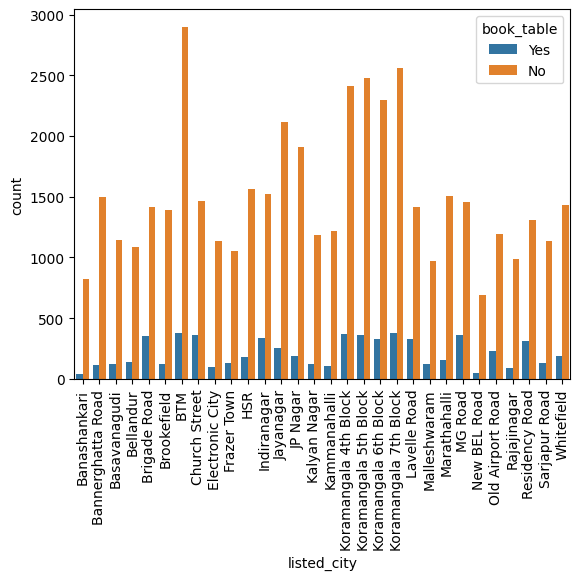

In [1388]:
sb.countplot(x='listed_city',hue='book_table',data=df)
plt.xticks(rotation=90)
plt.show()

### 3.rate

#### rate & votes 

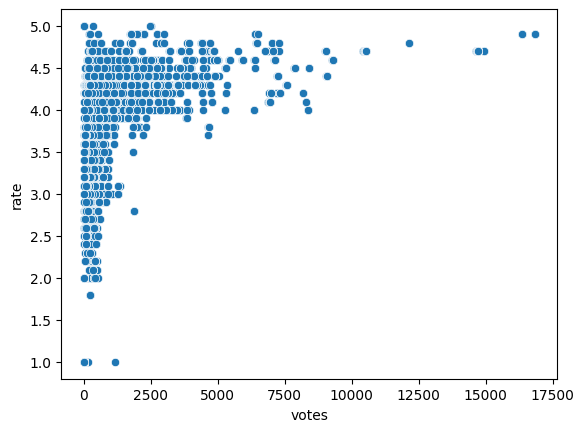

In [1389]:
sb.scatterplot(x='votes',y='rate',data=df)
plt.show()

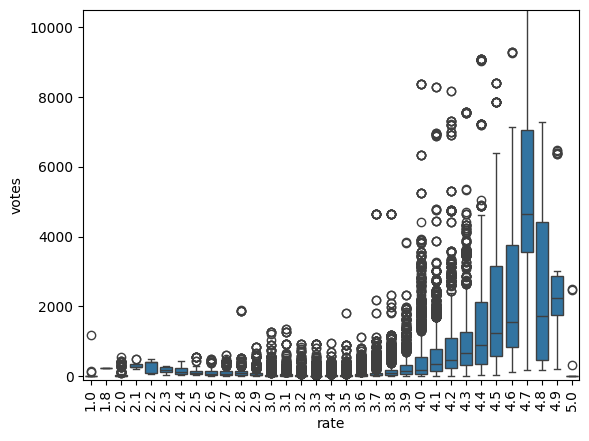

In [1390]:
sb.boxplot(x='rate',y='votes',data=df)
plt.xticks(rotation=90)
plt.ylim(-100,10500)
plt.show()


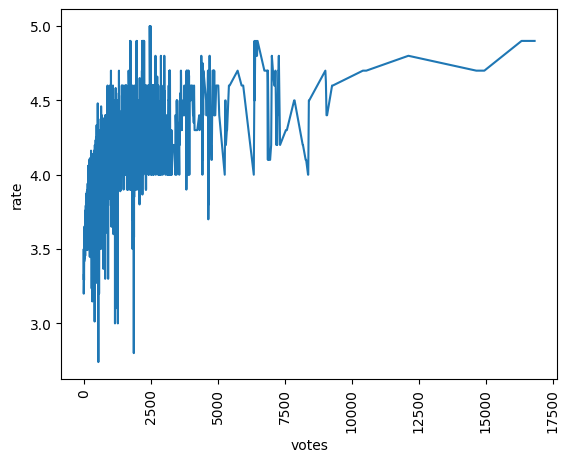

In [1391]:
sb.lineplot(x='votes',y='rate',data=df,errorbar=None)
plt.xticks(rotation=90)
plt.show()

#### rate & rest_type

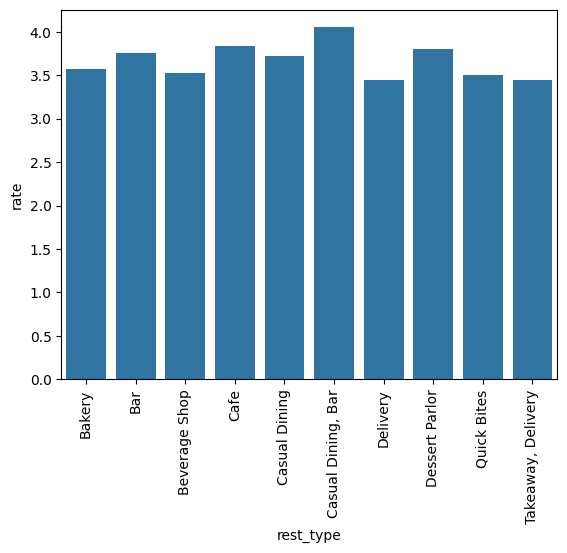

In [1392]:
# Get the top 10 rest_type by count
top_10 = df['rest_type'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 rest_type
filtered_df = df[df['rest_type'].isin(top_10)]

rest_type_rate=filtered_df.groupby('rest_type')['rate'].mean()
sb.barplot(rest_type_rate)
plt.xticks(rotation=90)
plt.show()

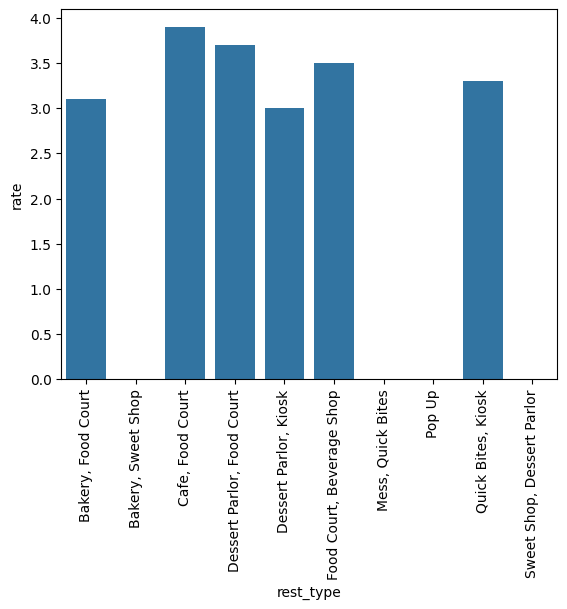

In [1393]:

# Get the bottom_10 rest_type by count
bottom_10 = df['rest_type'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10 rest_type
filtered_df = df[df['rest_type'].isin(bottom_10)]

rest_type_rate=filtered_df.groupby('rest_type')['rate'].mean()
sb.barplot(rest_type_rate)
plt.xticks(rotation=90)
plt.show()

#### rate & location

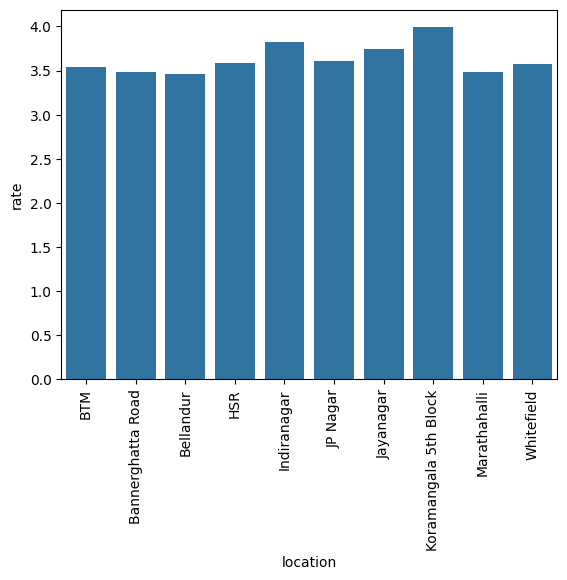

In [1394]:
# Get the top 10 location by count
top_10 = df['location'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 location
filtered_df = df[df['location'].isin(top_10)]

location_rate=filtered_df.groupby('location')['rate'].mean()
sb.barplot(location_rate)
plt.xticks(rotation=90)
plt.show()

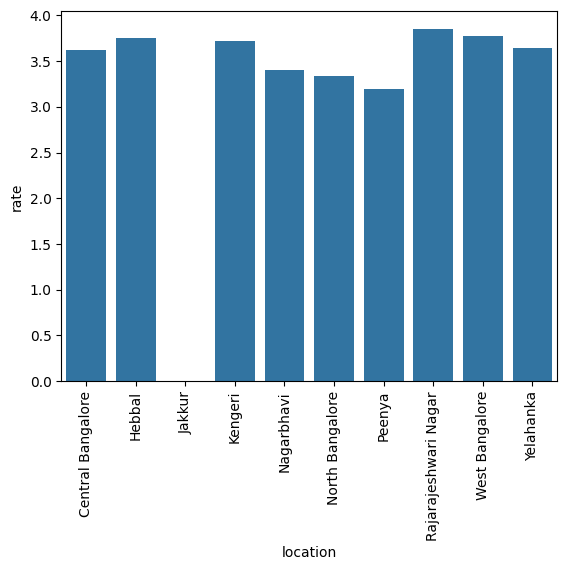

In [1395]:
# Get the bottom_10 location by count
bottom_10 = df['location'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10 location
filtered_df = df[df['location'].isin(bottom_10)]

location_rate=filtered_df.groupby('location')['rate'].mean()
sb.barplot(location_rate)
plt.xticks(rotation=90)
plt.show()

#### rate & cuisines

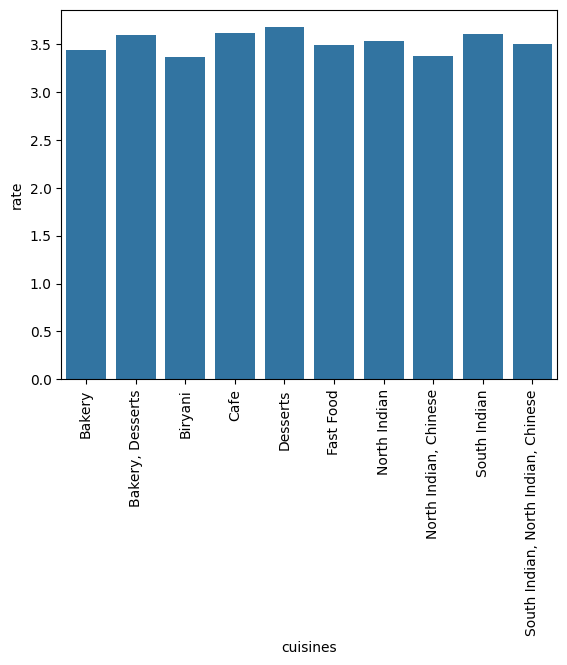

In [1396]:
# Get the top 10 cuisines by count
top_10 = df['cuisines'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 cuisines
filtered_df = df[df['cuisines'].isin(top_10)]

cuisines_rate=filtered_df.groupby('cuisines')['rate'].mean()
sb.barplot(cuisines_rate)
plt.xticks(rotation=90)
plt.show()

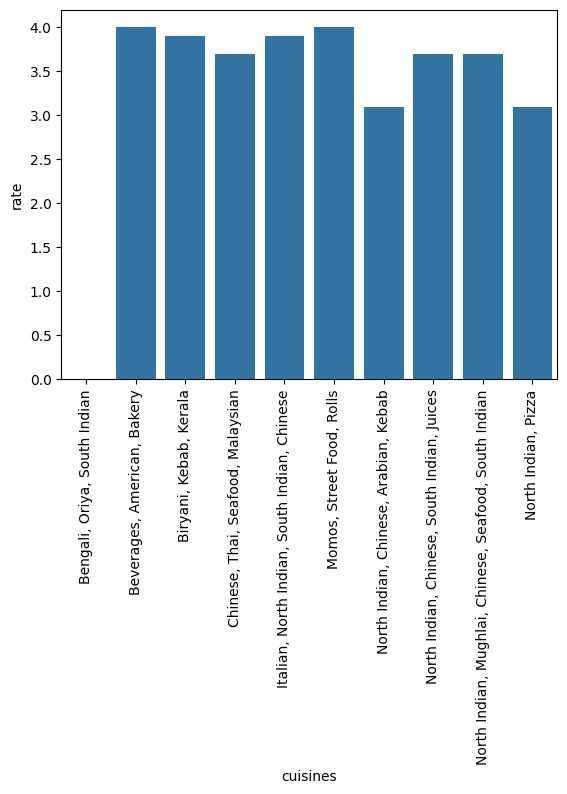

In [1397]:
# Get the bottom_10 cuisines by count
bottom_10 = df['cuisines'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10 cuisines
filtered_df = df[df['cuisines'].isin(bottom_10)]

cuisines_rate=filtered_df.groupby('cuisines')['rate'].mean()
sb.barplot(cuisines_rate)
plt.xticks(rotation=90)
plt.show()

#### rate & twos_cost

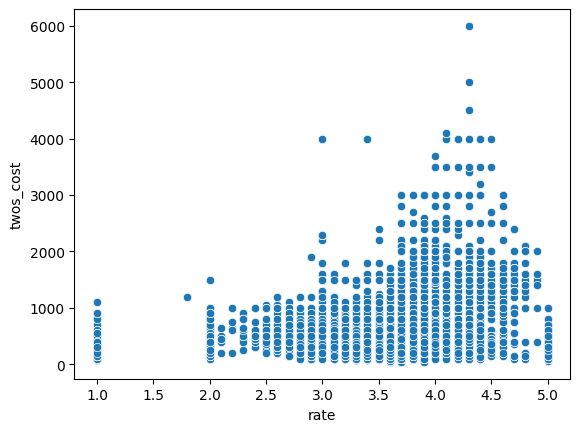

In [1398]:
sb.scatterplot(x='rate',y='twos_cost',data=df)
plt.show()

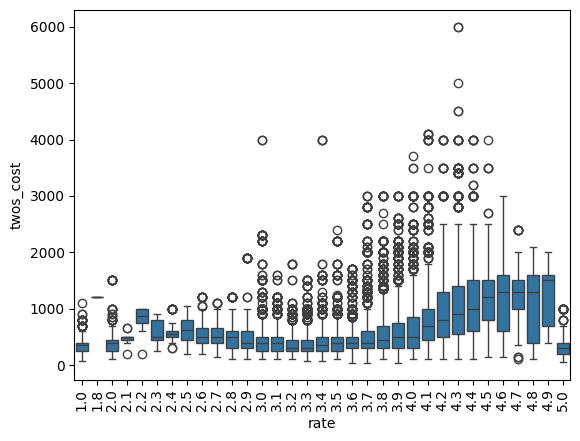

In [1399]:
sb.boxplot(x='rate',y='twos_cost',data=df)
plt.xticks(rotation=90)
plt.show()


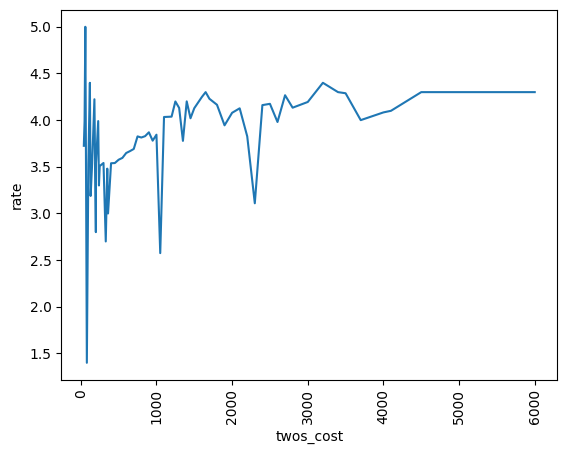

In [1400]:
sb.lineplot(y='rate',x='twos_cost',data=df,errorbar=None)
plt.xticks(rotation=90)
plt.show()

#### rate & listed_type

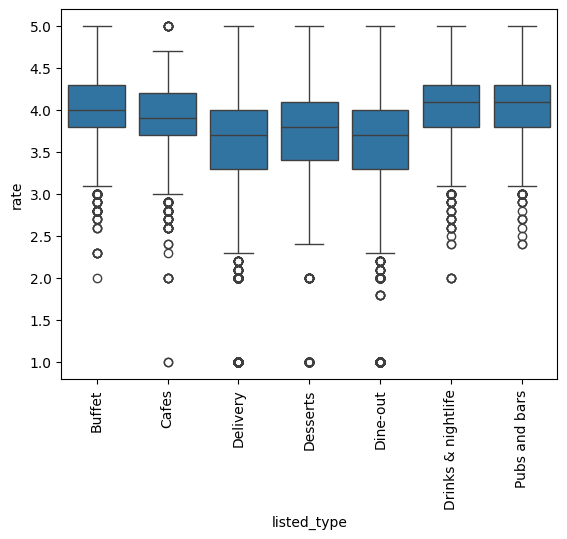

In [1401]:
sb.boxplot(x='listed_type',y='rate',data=df)
plt.xticks(rotation=90)
plt.show()

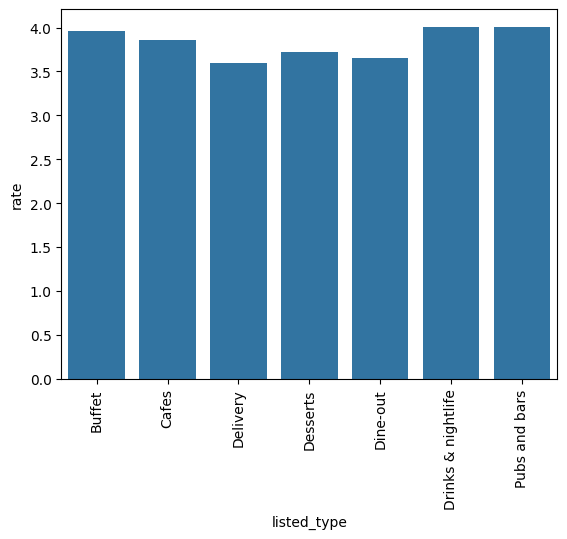

In [1402]:
sb.barplot(df.groupby('listed_type')['rate'].mean())
plt.xticks(rotation=90)
plt.show()

#### rate & listed_city

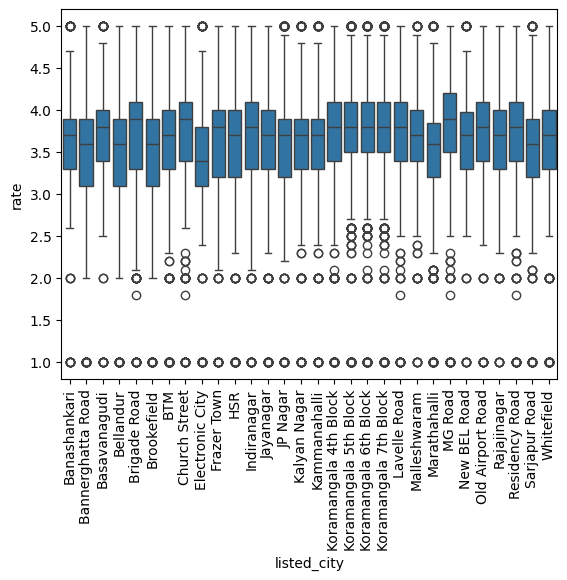

In [1403]:
sb.boxplot(x='listed_city',y='rate',data=df)
plt.xticks(rotation=90)
plt.show()

### 4.votes

#### votes & location

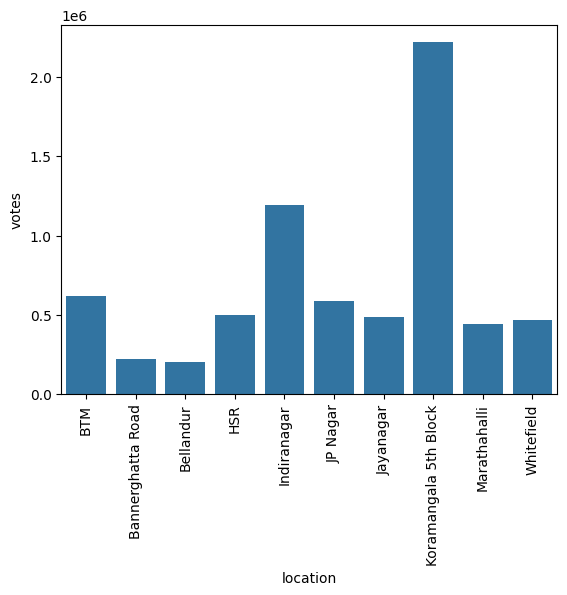

In [1404]:
# Get the top 10 location by count
top_10 = df['location'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 location
filtered_df = df[df['location'].isin(top_10)]

location_votes=filtered_df.groupby('location')['votes'].sum()
sb.barplot(location_votes)
plt.xticks(rotation=90)
plt.show()

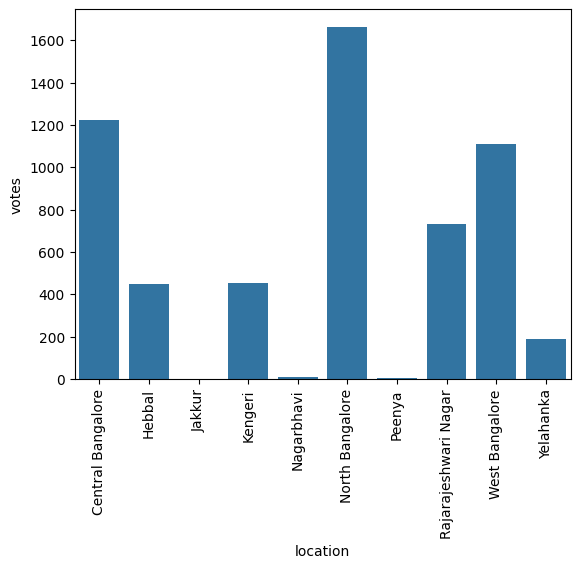

In [1405]:
# Get the bottom_10 location by count
bottom_10 = df['location'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10 location
filtered_df = df[df['location'].isin(bottom_10)]

location_votes=filtered_df.groupby('location')['votes'].sum()
sb.barplot(location_votes)
plt.xticks(rotation=90)
plt.show()

#### votes & rest_type

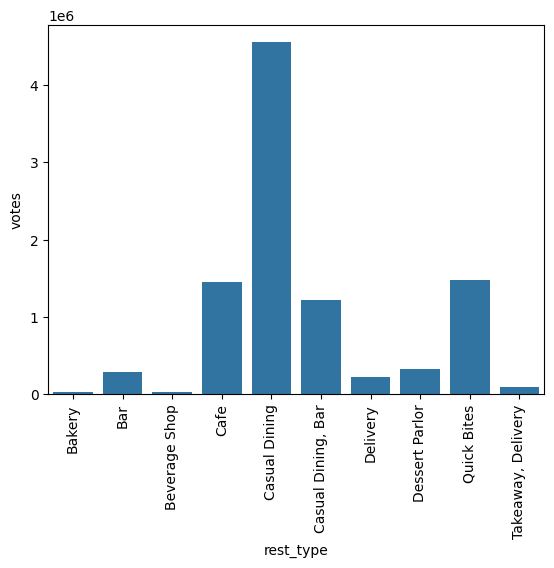

In [1406]:
# Get the top 10 rest_type by count
top_10 = df['rest_type'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 rest_type
filtered_df = df[df['rest_type'].isin(top_10)]

rest_type_votes=filtered_df.groupby('rest_type')['votes'].sum()
sb.barplot(rest_type_votes)
plt.xticks(rotation=90)
plt.show()

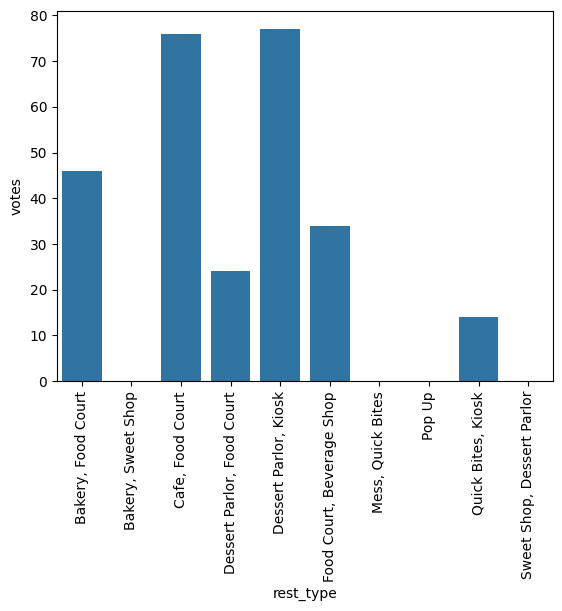

In [1407]:
# Get the bottom_10 rest_type by count
bottom_10 = df['rest_type'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10 rest_type
filtered_df = df[df['rest_type'].isin(bottom_10)]

rest_type_votes=filtered_df.groupby('rest_type')['votes'].sum()
sb.barplot(rest_type_votes)
plt.xticks(rotation=90)
plt.show()

#### votes & cuisines

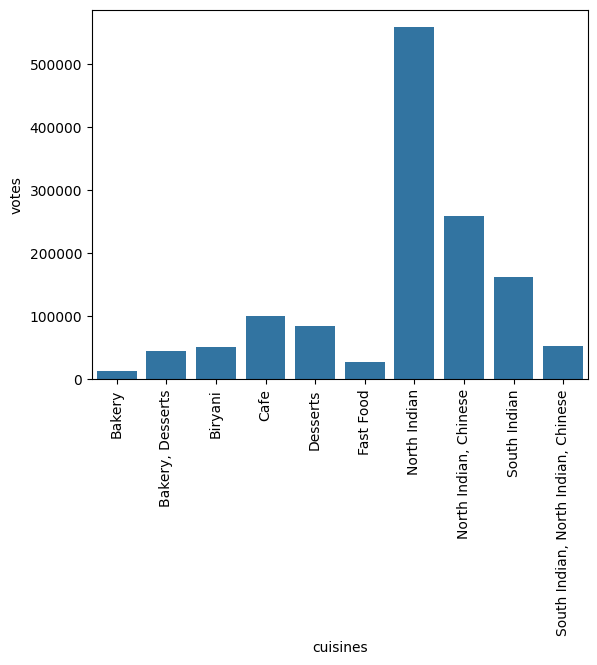

In [1408]:
# Get the top 10 cuisines by count
top_10 = df['cuisines'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 cuisines
filtered_df = df[df['cuisines'].isin(top_10)]

cuisines_votes=filtered_df.groupby('cuisines')['votes'].sum()
sb.barplot(cuisines_votes)
plt.xticks(rotation=90)
plt.show()

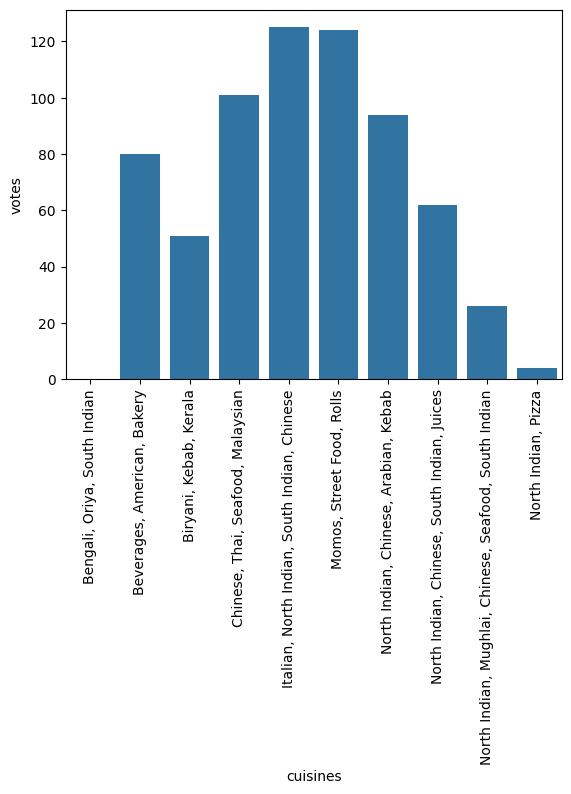

In [1409]:
# Get the bottom_10 cuisines by count
bottom_10 = df['cuisines'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10 cuisines
filtered_df = df[df['cuisines'].isin(bottom_10)]

cuisines_votes=filtered_df.groupby('cuisines')['votes'].sum()
sb.barplot(cuisines_votes)
plt.xticks(rotation=90)
plt.show()

#### votes & twos_cost

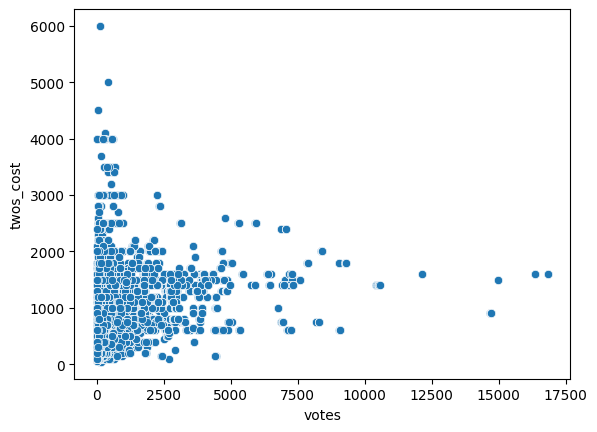

In [1410]:
sb.scatterplot(x='votes',y='twos_cost',data=df)
plt.show()

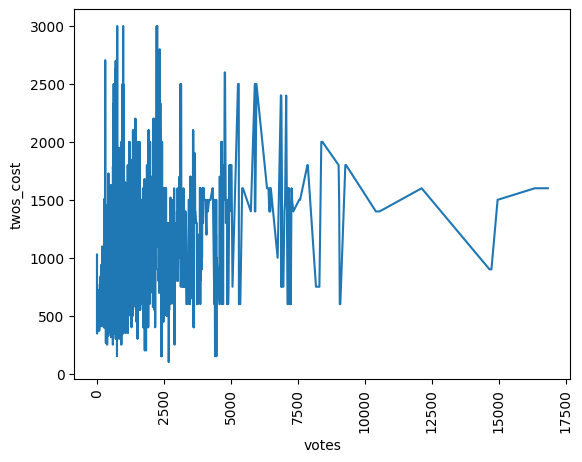

In [1411]:
sb.lineplot(x='votes',y='twos_cost',data=df,errorbar=None)
plt.xticks(rotation=90)
plt.show()

#### votes & listed_type

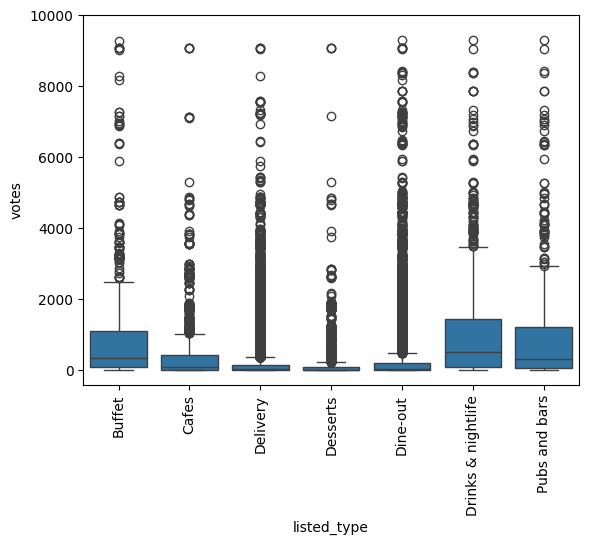

In [1412]:
sb.boxplot(x='listed_type',y='votes',data=df)
plt.xticks(rotation=90)
plt.ylim(-400,10000)
plt.show()

#### votes & listed_city

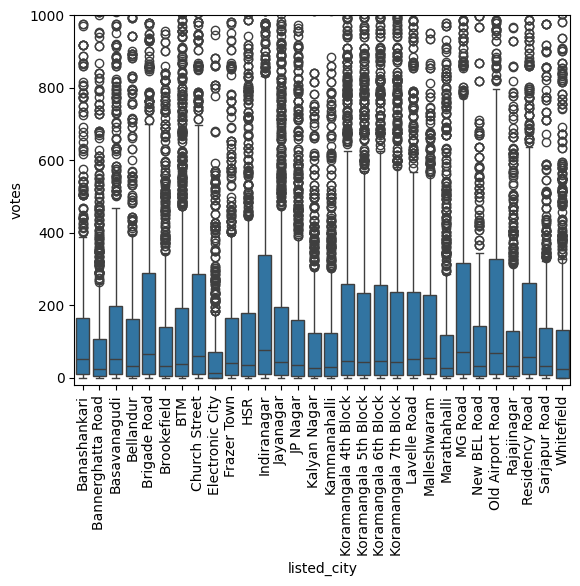

In [1413]:
sb.boxplot(x='listed_city',y='votes',data=df)
plt.xticks(rotation=90)
plt.ylim(-20,1000)
plt.show()

### 5.location

#### location & twos_cost

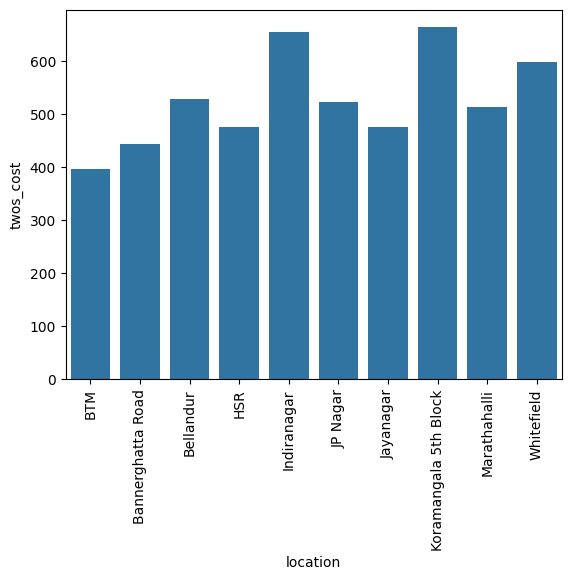

In [1414]:
# Get the top 10 location by count
top_10 = df['location'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 location
filtered_df = df[df['location'].isin(top_10)]

location_twos_cost=filtered_df.groupby('location')['twos_cost'].mean()
sb.barplot(location_twos_cost)
plt.xticks(rotation=90)
plt.show()

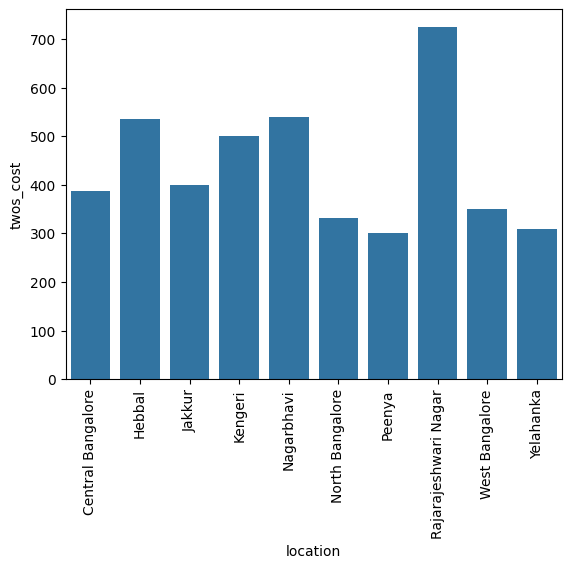

In [1415]:
# Get the bottom_10 location by count
bottom_10 = df['location'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10 location
filtered_df = df[df['location'].isin(bottom_10)]

location_twos_cost=filtered_df.groupby('location')['twos_cost'].mean()
sb.barplot(location_twos_cost)
plt.xticks(rotation=90)
plt.show()

### 6.rest_type

#### rest_type & twos_cost

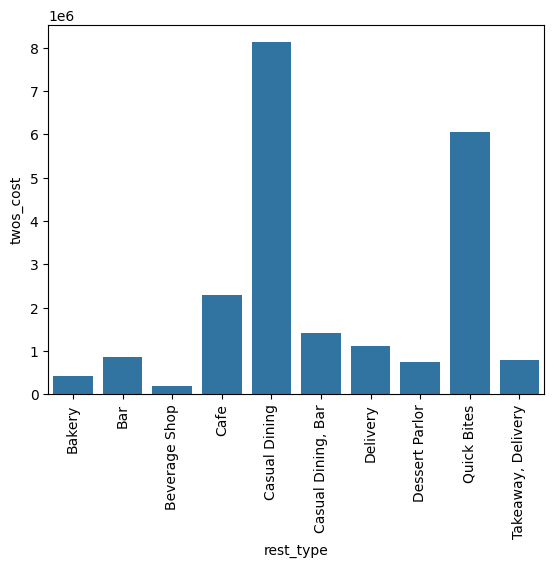

In [1416]:
# Get the top 10 rest_type by count
top_10 = df['rest_type'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 rest_type
filtered_df = df[df['rest_type'].isin(top_10)]

rest_type_twos_cost=filtered_df.groupby('rest_type')['twos_cost'].sum()
sb.barplot(rest_type_twos_cost)
plt.xticks(rotation=90)
plt.show()

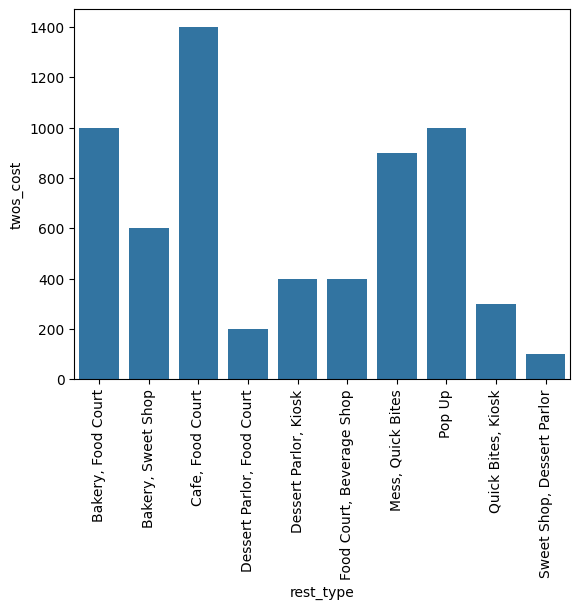

In [1417]:
# Get the bottom_10 rest_type by count
bottom_10 = df['rest_type'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10 rest_type
filtered_df = df[df['rest_type'].isin(bottom_10)]

rest_type_twos_cost=filtered_df.groupby('rest_type')['twos_cost'].sum()
sb.barplot(rest_type_twos_cost)
plt.xticks(rotation=90)
plt.show()

### 7.cuisines

#### cuisines & twos_cost

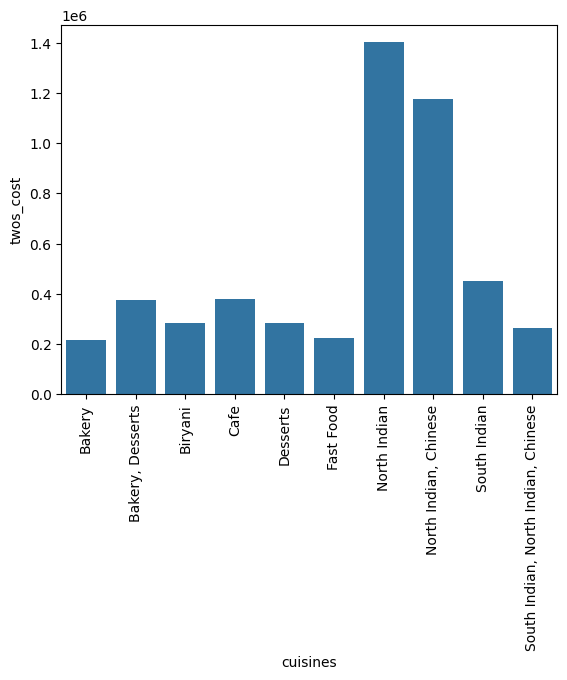

In [1418]:
# Get the top 10 cuisines by count
top_10 = df['cuisines'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 cuisines
filtered_df = df[df['cuisines'].isin(top_10)]

cuisines_twos_cost=filtered_df.groupby('cuisines')['twos_cost'].sum()
sb.barplot(cuisines_twos_cost)
plt.xticks(rotation=90)
plt.show()

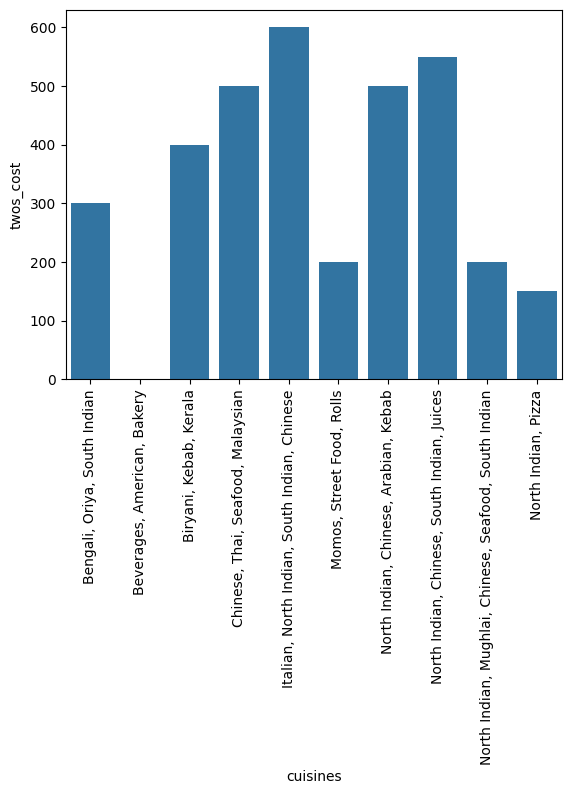

In [1419]:
# Get the bottom_10 cuisines by count
bottom_10 = df['cuisines'].value_counts().nsmallest(10).index

# Filter the dataset to include only the bottom_10 cuisines
filtered_df = df[df['cuisines'].isin(bottom_10)]

cuisines_twos_cost=filtered_df.groupby('cuisines')['twos_cost'].sum()
sb.barplot(cuisines_twos_cost)
plt.xticks(rotation=90)
plt.show()

### 8.twos_cost

#### twos_cost & listed_type

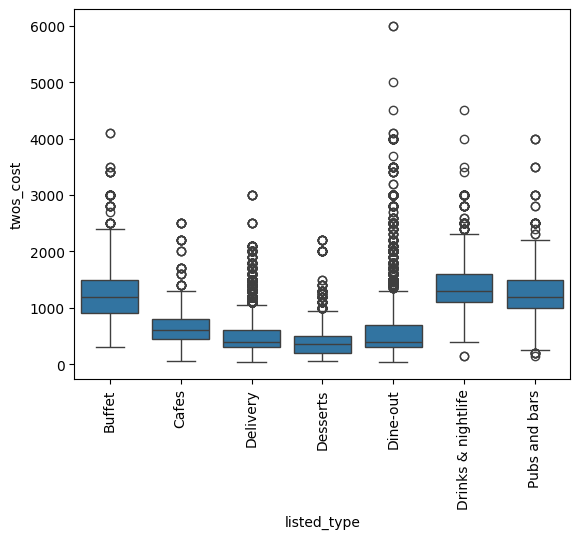

In [1420]:
sb.boxplot(x='listed_type',y='twos_cost',data=df)
plt.xticks(rotation=90)
plt.show()

#### twos_cost & listed_city

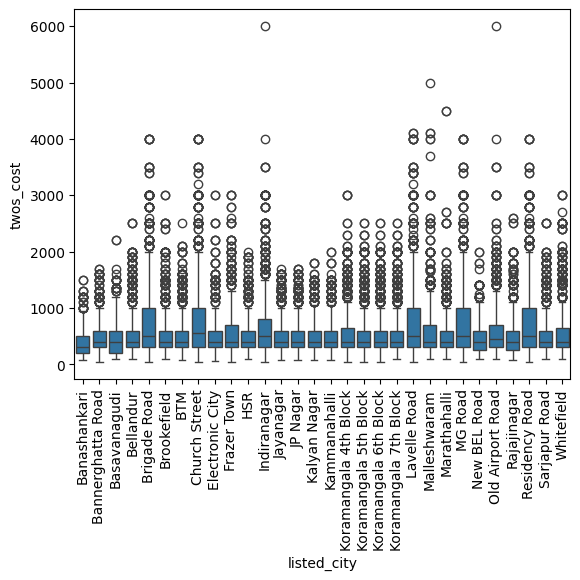

In [1421]:
sb.boxplot(x='listed_city',y='twos_cost',data=df)
plt.xticks(rotation=90)
plt.show()

### Multivariate Analysis

### online_order & book_table & rate

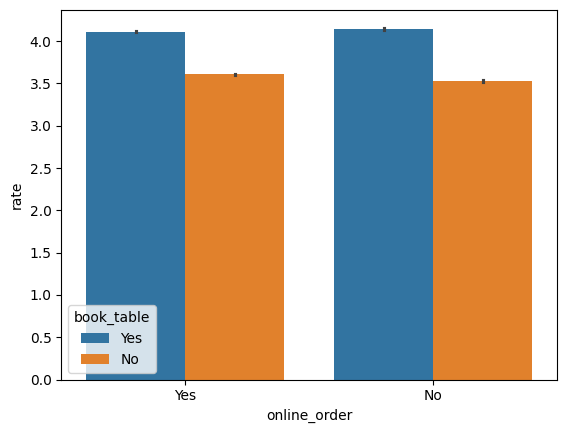

In [1422]:
sb.barplot(x='online_order',y='rate',data=df,hue='book_table')
plt.show()

### online_order & book_table & votes

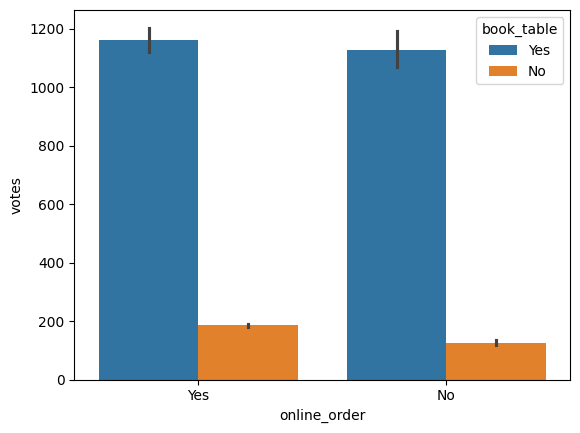

In [1423]:
sb.barplot(x='online_order',y='votes',data=df,hue='book_table')
plt.show()

### online_order & book_table & twos_cost

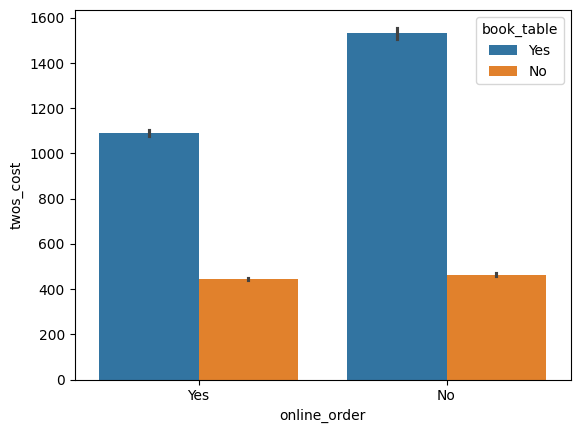

In [1424]:
sb.barplot(x='online_order',y='twos_cost',data=df,hue='book_table')
plt.show()

### book_table &  rate & votes

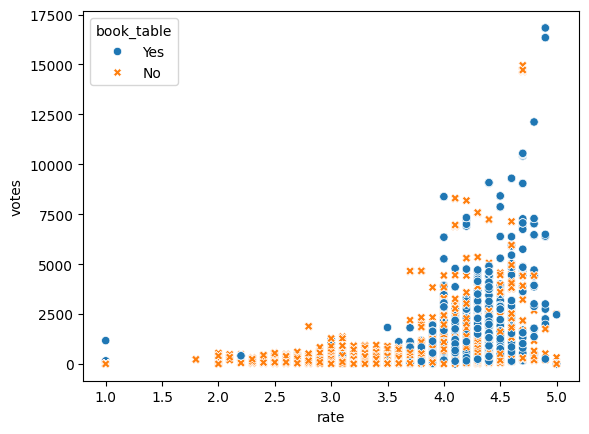

In [1425]:
sb.scatterplot(x='rate',y='votes',hue='book_table',data=df,style='book_table')
plt.show()

### book_table &  rate & twos_cost

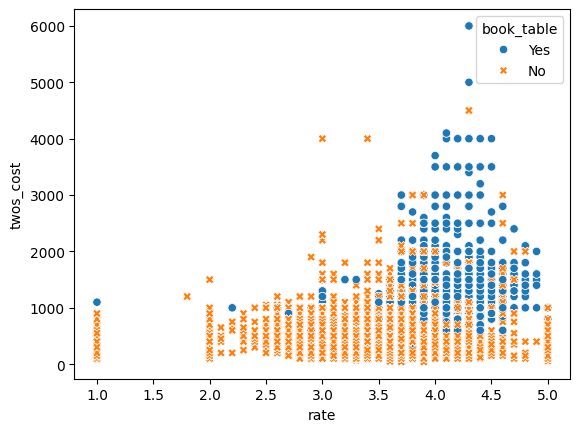

In [1426]:
sb.scatterplot(x='rate',y='twos_cost',hue='book_table',data=df,style='book_table')
plt.show()

### book_table &  rate & listed_type

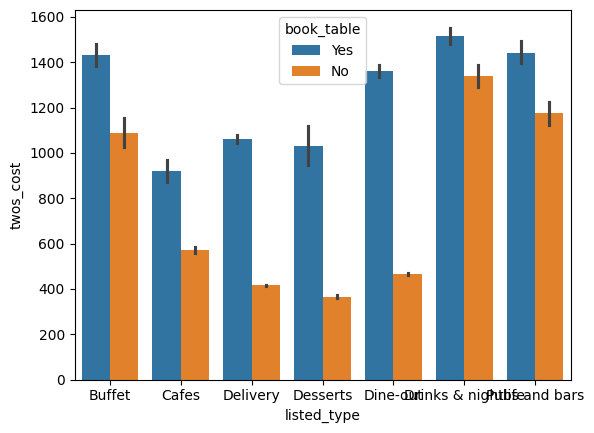

In [1427]:
sb.barplot(x='listed_type',y='twos_cost',data=df,hue='book_table')
plt.show()

### rate & votes & twos_cost

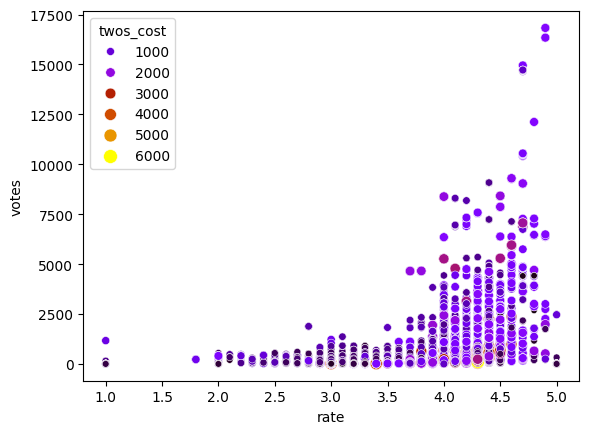

In [1428]:
sb.scatterplot(x='rate', y='votes',size='twos_cost',hue='twos_cost',palette='gnuplot',sizes=(20, 100),data=df)
plt.show()


### rate & votes & listed_type

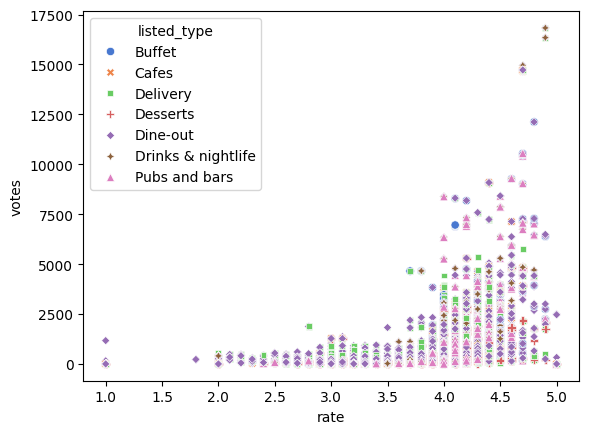

In [1429]:
sb.scatterplot(x='rate',y='votes',hue='listed_type',data=df,style='listed_type',palette='muted')
plt.show()

### twos_cost & votes & listed_type

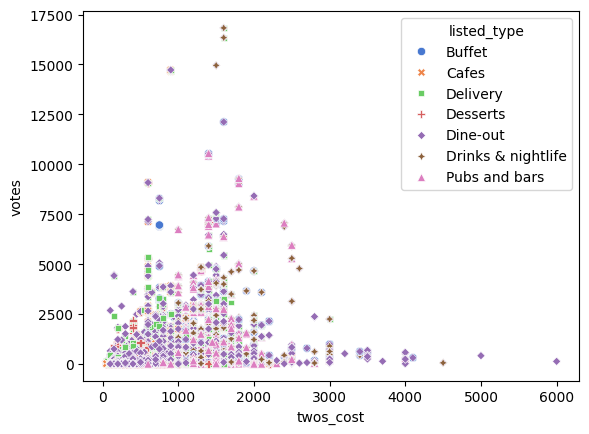

In [1430]:
sb.scatterplot(x='twos_cost',y='votes',hue='listed_type',data=df,style='listed_type',palette='muted')
plt.show()

### rate & votes & online_order

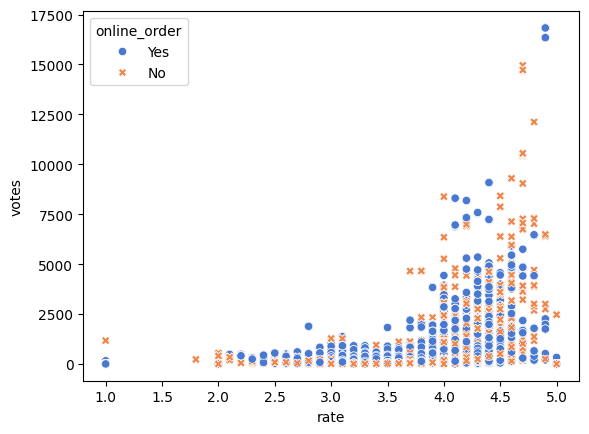

In [1431]:
sb.scatterplot(x='rate',y='votes',hue='online_order',data=df,style='online_order',palette='muted')
plt.show()

### rate & votes & book_table

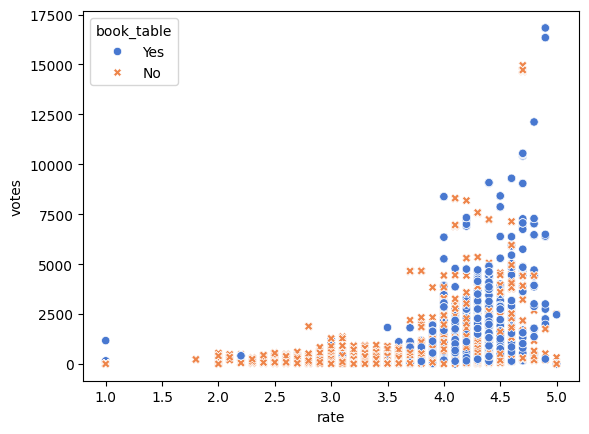

In [1432]:
sb.scatterplot(x='rate',y='votes',hue='book_table',data=df,style='book_table',palette='muted')
plt.show()

### rate & twos_cost & book_table

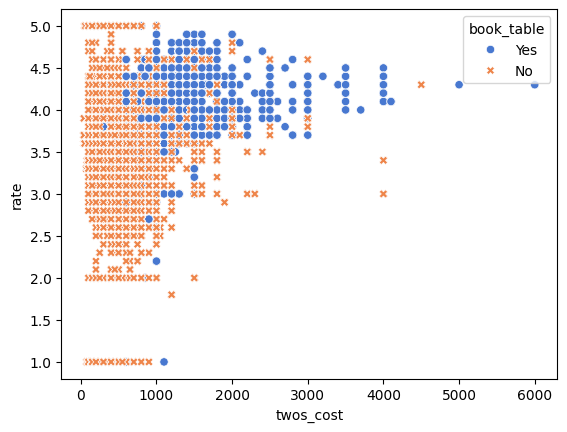

In [1433]:
sb.scatterplot(x='twos_cost',y='rate',hue='book_table',data=df,style='book_table',palette='muted')
plt.show()

### rate & twos_cost & online_order

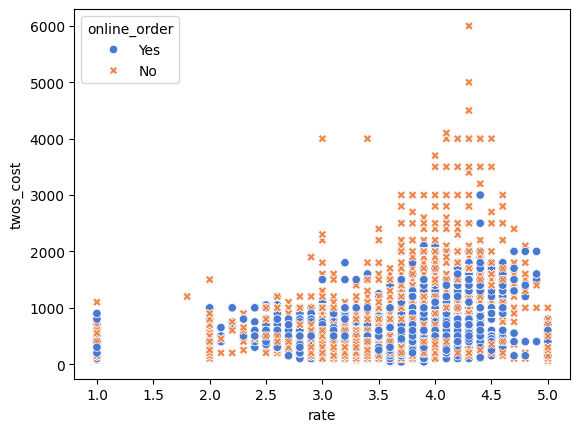

In [1434]:
sb.scatterplot(x='rate',y='twos_cost',hue='online_order',data=df,style='online_order',palette='muted')
plt.show()

### vote & twos_cost & book_table

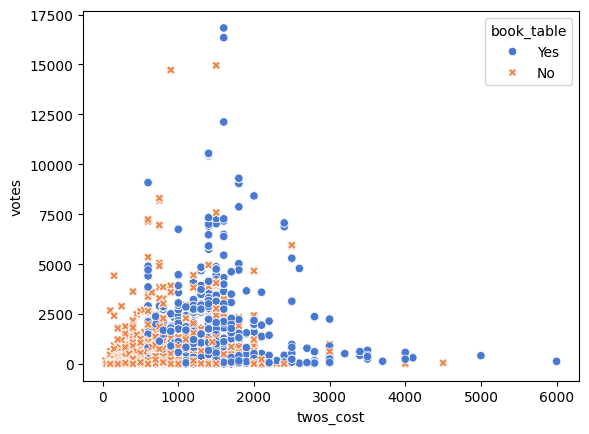

In [1435]:
sb.scatterplot(x='twos_cost',y='votes',hue='book_table',data=df,style='book_table',palette='muted')
plt.show()

### vote & twos_cost & online_order

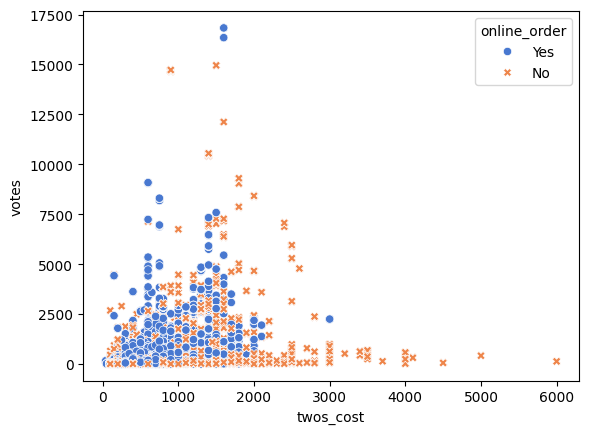

In [1436]:
sb.scatterplot(x='twos_cost',y='votes',hue='online_order',data=df,style='online_order',palette='muted')
plt.show()

# Cleaning2

## outliers handling

In [1437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           51717 non-null  object 
 1   address       51717 non-null  object 
 2   name          51717 non-null  object 
 3   online_order  51717 non-null  object 
 4   book_table    51717 non-null  object 
 5   rate          44166 non-null  float64
 6   votes         51717 non-null  int64  
 7   phone         50509 non-null  object 
 8   location      51696 non-null  object 
 9   rest_type     51717 non-null  object 
 10  dish_liked    51717 non-null  object 
 11  cuisines      51717 non-null  object 
 12  twos_cost     51371 non-null  float64
 13  reviews_list  51717 non-null  object 
 14  menu_item     51717 non-null  object 
 15  listed_type   51717 non-null  object 
 16  listed_city   51717 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 6.7+ MB


### 1.rate

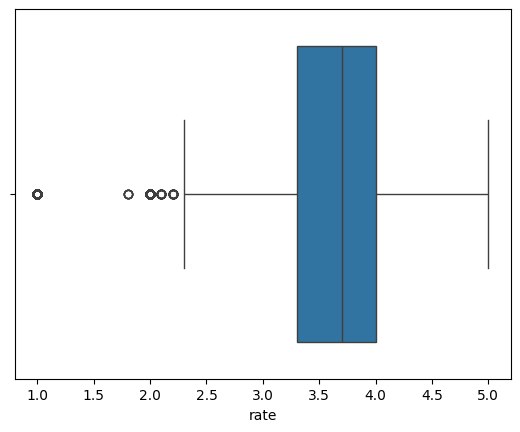

In [1438]:
sb.boxplot(x='rate',data=df)
plt.show()

In [1439]:
q1=df['rate'].quantile(.25)
q3=df['rate'].quantile(.75)
iqr=q3-q1
lower=np.round(q1-1.5*iqr,1)
higher=np.floor(q3+1.5*iqr)
print(lower , higher)
rate_outliers=df[(df['rate'] < lower) | (df['rate'] > higher)]
rate_outliers
#i will keep the outliers because they are  important


2.2 5.0


url  \
90     https://www.zomato.com/bangalore/me-and-my-cak...   
114    https://www.zomato.com/bangalore/cake-bite-ban...   
206    https://www.zomato.com/bangalore/dal-tadkaa-ba...   
242    https://www.zomato.com/bangalore/aahar-cafe-ba...   
265    https://www.zomato.com/bangalore/the-chaat-sho...   
...                                                  ...   
51303  https://www.zomato.com/bangalore/bawarchi-rest...   
51448  https://www.zomato.com/bangalore/vydehi-green-...   
51450  https://www.zomato.com/bangalore/shree-alvas-d...   
51490  https://www.zomato.com/bangalore/srf-family-re...   
51599  https://www.zomato.com/bangalore/momo-time-whi...   

                                                 address  \
90     BDA Shopping Complex, 24th Cross Road, Siddann...   
114    Near Seetha Circle, Vivekananda Park Road, Gir...   
206    1, Kathriguppe Main Road, 3rd Stage, Banashank...   
242    39/4, North Anjaneya Temple Street, Basavanagu...   
265    11/4, Old Market Road, V V Puram, Basavanagudi...   
...                                                  ...   
51303  10-369, 10th Cross, Ambedkar Nagar, Hope Farm ...   
51448  82, EPIP Area, Next to Vydehi Gate, Whitefield...   
51450  Behind Indian Oil Petrol Pump, SAP Labs, Graph...   
51490  Near MVJ College, Channasandra Main Road, Whit...   
51599  9/91, 1st Floor, Near SKA Kalyan Mantapa, Vart...   

                                            name online_order book_table  \
90                                Me And My Cake           No         No   
114                                    Cake Bite           No         No   
206                                   Dal Tadkaa          Yes         No   
242                                   Aahar Cafe           No         No   
265                               The Chaat Shop          Yes         No   
...                                          ...          ...        ...   
51303                        Bawarchi Restaurant          Yes         No   
51448  Vydehi Green Park Multicuisine Restaurant           No         No   
51450                      Shree Alva's Delicacy           No         No   
51490                      SRF Family Restaurant           No         No   
51599                                  Momo Time          Yes         No   

       rate  votes                           phone      location  \
90      1.0      0                  +91 9036070410  Banashankari   
114     1.0      0                  +91 8277102303  Banashankari   
206     2.0    247  080 26691763\r\n+91 9620138000  Banashankari   
242     1.0      0                  +91 9448353673  Basavanagudi   
265     2.0     35                  +91 9066510817  Basavanagudi   
...     ...    ...                             ...           ...   
51303   1.0      0                  +91 8747022949    Whitefield   
51448   2.0      0                  +91 7795206887    Whitefield   
51450   1.0      0                  +91 9900809037    Whitefield   
51490   2.0      0                  +91 9901562091    Whitefield   
51599   1.0      0                  +91 7005889963    Whitefield   

           rest_type                                         dish_liked  \
90          Delivery                                            missing   
114           Bakery                                            missing   
206    Casual Dining  Paratha, Boondi Raita, Roti, Kulfi, Panneer Bu...   
242      Quick Bites                                            missing   
265      Quick Bites  Badam Milk, Potato Twister, Pav Bhaji, Panipur...   
...              ...                                                ...   
51303        missing                                            missing   
51448    Quick Bites                                            missing   
51450    Quick Bites                                            missing   
51490    Quick Bites                                            missing   
51599    Quick Bites                                    

### 2.twos_cost

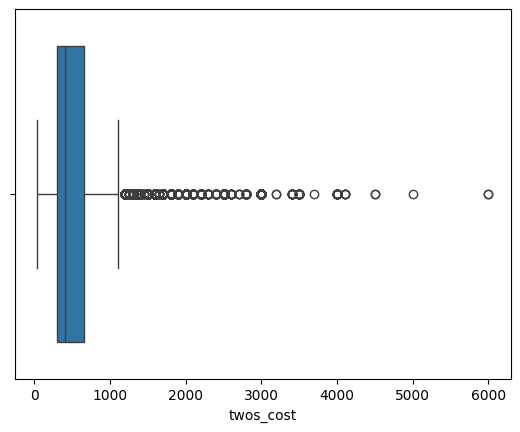

In [1440]:
sb.boxplot(x='twos_cost',data=df)
plt.show()

In [1441]:
q1=df['twos_cost'].quantile(.25)
q3=df['twos_cost'].quantile(.75)
iqr=q3-q1
lower=np.round(q1-1.5*iqr,1)
higher=np.floor(q3+1.5*iqr)
print(lower , higher)
twos_cost_outliers=df[(df['twos_cost'] < 0) | (df['twos_cost'] > higher)]
twos_cost_outliers
#i will keep the outliers because they are  important

-225.0 1175.0


url  \
67     https://www.zomato.com/gustoesbeerhouse?contex...   
166    https://www.zomato.com/bangalore/patio-805-jay...   
207    https://www.zomato.com/bangalore/chutney-chang...   
217    https://www.zomato.com/bangalore/toscano-jayan...   
278    https://www.zomato.com/bangalore/gufha-the-pre...   
...                                                  ...   
51708  https://www.zomato.com/bangalore/keys-cafe-key...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
67     10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...   
166    805, Ground Floor, 35C Cross, 9th Main, 4th Bl...   
207    Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya...   
217    359/38,Next to Fabindia, 7th Cross, 1st Block,...   
278    The President Hotel, 79/8, Diagonal Road, 3rd ...   
...                                                  ...   
51708  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
67                                    Gustoes Beer House           No   
166                                            Patio 805          Yes   
207                                        Chutney Chang          Yes   
217                                              Toscano          Yes   
278                          Gufha - The President Hotel          Yes   
...                                                  ...          ...   
51708                             Keys Cafe - Keys Hotel           No   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                           phone  \
67            No   4.1    868                    080 49653521   
166          Yes   4.1    364                  +91 8884999805   
207          Yes   4.1   2339  080 22443007\r\n+91 9901967373   
217          Yes   4.3   1129  080 41558423\r\n+91 7619320074   
278          Yes   4.1   1875  080 41808777\r\n+91 9900265022   
...          ...   ...    ...                             ...   
51708         No   2.8    161    080 39451000\n+91 8884038484   
51712         No   3.6     27                    080 40301477   
51714         No   NaN      0                             NaN   
51715        Yes   4.3    236                    080 49652769   
51716         No   3.4     13                  +91 8071117272   

                         location           rest_type  \
67                   Banashankari                 Pub   
166                     Jayanagar       Casual Dining   
207                     Jayanagar       Casual Dining   
217                     Jayanagar       Casual Dining   
278                     Jayanagar       Casual Dining   
...                           ...                 ...   
51708                  Whitefield  Casual Dining, Bar   
51712                  Whitefield                 Bar   
51714                  Whitefield                 Bar   
51715  ITPL Main Road, Whitefield                 Bar   
51716  ITPL Main Road, Whitefield  Bar, Casual Dining   

                                              dish_liked  \
67     Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...   
166    Noodles, Laksa Soup, Coffee, Veg Fritters, Veg...   
207    Veg Momos, Brownie Chocolate, Palak Chaat, Mut...   
217    Pizza, Pasta, Salads,

### 3.votes

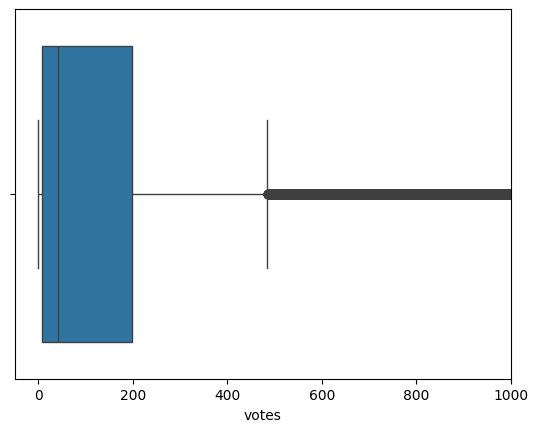

In [1442]:
sb.boxplot(x='votes',data=df)
plt.xlim(-50,1000)
plt.show()

In [1443]:
q1=df['votes'].quantile(.25)
q3=df['votes'].quantile(.75)
iqr=q3-q1
lower=np.round(q1-1.5*iqr,1)
higher=np.floor(q3+1.5*iqr)
print(lower , higher)
votes_outliers=df[(df['votes'] < 0) | (df['votes'] > higher)]
votes_outliers
#i will keep the outliers because they are  important

-279.5 484.0


url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
7      https://www.zomato.com/bangalore/onesta-banash...   
9      https://www.zomato.com/bangalore/smacznego-ban...   
...                                                  ...   
51699  https://www.zomato.com/bangalore/harrys-bar-ca...   
51700  https://www.zomato.com/bangalore/bar-bar-white...   
51701  https://www.zomato.com/bangalore/the-beer-cafe...   
51702  https://www.zomato.com/bangalore/pablos-gastro...   
51703  https://www.zomato.com/bangalore/olivers-pub-d...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
7      2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
9      2470, 21 Main Road, 25th Cross, Banashankari, ...   
...                                                  ...   
51699  S-10, Level 2, Phoenix Market City, Whitefield...   
51700  Level 2, Phoenix Marketcity, Whitefield, Banga...   
51701  Unit 4A - 4B, Upper Ground Floor, VR Bengaluru...   
51702  2, Graphite India Road, Doddanekundi Industria...   
51703  ITPL Ascendas Park Square Mall, ITPL, First Fl...   

                       name online_order book_table  rate  votes  \
0                     Jalsa          Yes        Yes   4.1    775   
1            Spice Elephant          Yes         No   4.1    787   
2           San Churro Cafe          Yes         No   3.8    918   
7                    Onesta          Yes        Yes   4.6   2556   
9                 Smacznego          Yes         No   4.2    504   
...                     ...          ...        ...   ...    ...   
51699    Harry's Bar + Cafe          Yes        Yes   4.1   1218   
51700               BAR BAR           No        Yes   4.1   1003   
51701         The Beer Cafe          Yes        Yes   4.1    673   
51702     Pablo's Gastrobar           No         No   4.0   1094   
51703  Oliver's Pub & Diner          Yes        Yes   3.9    548   

                                  phone      location            rest_type  \
0        080 42297555\r\n+91 9743772233  Banashankari        Casual Dining   
1                          080 41714161  Banashankari        Casual Dining   
2                        +91 9663487993  Banashankari  Cafe, Casual Dining   
7          080 48653961\r\n080 48655715  Banashankari  Casual Dining, Cafe   
9      +91 9945230807\r\n+91 9743804471  Banashankari                 Cafe   
...                                 ...           ...                  ...   
51699    +91 7676924054\n+91 9137153744    Whitefield                  Pub   
51700    +91 7338630404\n+91 8067266651    Whitefield   Bar, Casual Dining   
51701                    +91 8929188573    Whitefield                  Pub   
51702                     00 9108214702    Whitefield                  Bar   
51703    +91 8043691111\n+91 8028026519    Whitefield   Pub, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
7      Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
9      Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   
...                                                  ...   
51699  Cocktails, Beer, Long Island Iced Tea, Pasta, ...   
51700  Mocktails, Cocktails, Pizza, Chicken Tikka, Na...   
51701  Cocktails, Wheat Beer, Bruschettas, Pasta, Bur...   
51702  Cocktails, Beer, Pizza, Long Island Iced Tea, ...   
51703  Pizza, Beer, Cocktails, Nachos, Pasta, Moo Bur...   

                                                cuisines  twos_cost  \
0                         North Indian, Mughlai, Chinese      800

## Missing values handling

### 1.rate

In [1444]:
print(df[df['rate']<=0.0])

Empty DataFrame
Columns: [url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, twos_cost, reviews_list, menu_item, listed_type, listed_city]
Index: []


### 2.twos_cost

In [1445]:
print(df[df['twos_cost']<=0.0])

Empty DataFrame
Columns: [url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, twos_cost, reviews_list, menu_item, listed_type, listed_city]
Index: []


### 3.votes

In [1446]:
print(df[df['votes']==0].head())
df.loc[df['votes']==0,'votes']=np.nan


                                                  url  \
72  https://www.zomato.com/bangalore/spicy-tandoor...   
75  https://www.zomato.com/bangalore/om-sri-vinaya...   
84  https://www.zomato.com/bangalore/chill-out-ban...   
90  https://www.zomato.com/bangalore/me-and-my-cak...   
91  https://www.zomato.com/bangalore/sunsadm-banas...   

                                              address                   name  \
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...          Spicy Tandoor   
75  39, S B M Colony, Near-Sita Circle, 1st Stage,...  Om Sri Vinayaka Chats   
84  161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...              Chill Out   
90  BDA Shopping Complex, 24th Cross Road, Siddann...         Me And My Cake   
91  Shop 18 , 3rd cross road,Markandeya Layout, Ba...                Sunsadm   

   online_order book_table  rate  votes           phone      location  \
72           No         No   NaN      0  +91 8050884222  Banashankari   
75           No         No   N

In [1447]:
print(df[df['votes']==0])

Empty DataFrame
Columns: [url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, twos_cost, reviews_list, menu_item, listed_type, listed_city]
Index: []


### 4.reviews_list

In [1448]:
print(df[df['reviews_list']=='[]'])
df.loc[df['reviews_list']=='[]','reviews_list']=np.nan


                                                     url  \
75     https://www.zomato.com/bangalore/om-sri-vinaya...   
91     https://www.zomato.com/bangalore/sunsadm-banas...   
92     https://www.zomato.com/bangalore/annapooranesh...   
95     https://www.zomato.com/bangalore/vi-ras-bar-an...   
107    https://www.zomato.com/bangalore/coffee-shopee...   
...                                                  ...   
51643  https://www.zomato.com/bangalore/new-ambur-bir...   
51644  https://www.zomato.com/bangalore/punjabi-thadk...   
51672  https://www.zomato.com/bangalore/slounge-lemon...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   

                                                 address  \
75     39, S B M Colony, Near-Sita Circle, 1st Stage,...   
91     Shop 18 , 3rd cross road,Markandeya Layout, Ba...   
92     625, 5th Cross Road, Hanumanthnagar, Banashank...   
95     3828, Near Deve Gowda Petrol Bun

In [1449]:
print(df[df['reviews_list']=='[]'])

Empty DataFrame
Columns: [url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, twos_cost, reviews_list, menu_item, listed_type, listed_city]
Index: []


### 5.menu_item


In [1450]:
print(df[df['menu_item']=='[]'])


                                                     url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stag

In [1451]:
df.loc[df['menu_item']=='[]','menu_item']=np.nan

### add column dish_liked_counts (Feature Engineering)

In [1452]:
df['dish_liked_counts']=dfdsh_rt['dish_liked_counts']

In [1453]:
df.loc[df['dish_liked_counts']==0,'dish_liked_counts']=np.nan

In [1454]:
print(len(df[df['dish_liked_counts'].isnull()]))

28078


### add column rest_type_counts (Feature Engineering)

In [1455]:
df['rest_type_counts']=dfrs_rt['rest_type_counts']

In [1456]:
df.loc[df['rest_type_counts']==0,'rest_type_counts']=np.nan

In [1457]:
print(len(df[df['rest_type_counts'].isnull()]))

227


### add column cuisines_counts (Feature Engineering)

In [1458]:
df['cuisines_counts']=dfcu_rt['cuisines_counts']

In [1459]:
df.loc[df['cuisines_counts']==0,'cuisines_counts']=np.nan

In [1460]:
print(len(df[df['cuisines_counts'].isnull()]))

45


In [1461]:
df.shape

(51717, 20)

## Deal with nulls

In [1462]:
df.isnull().mean()*100

url                   0.000000
address               0.000000
name                  0.000000
online_order          0.000000
book_table            0.000000
rate                 14.600615
votes                19.388209
phone                 2.335789
location              0.040606
rest_type             0.000000
dish_liked            0.000000
cuisines              0.000000
twos_cost             0.669026
reviews_list         14.685693
menu_item            76.603438
listed_type           0.000000
listed_city           0.000000
dish_liked_counts    54.291626
rest_type_counts      0.438927
cuisines_counts       0.087012
dtype: float64

### 1.rate

In [1463]:
# med=df['rate'].median()
# print(med)

In [1464]:
#df['rate']=df['rate'].replace(np.nan,med)

### 2. votes

In [1465]:
# medv=int(np.ceil(df['votes'].median()))
# print(medv)

In [1466]:
# df['votes']=df['votes'].replace(np.nan,medv)


In [1467]:
# df['votes']=df['votes'].astype('int')

In [1468]:
# df.isnull().mean()*100

### 3.twos_cost

In [1469]:
# medt=int(np.ceil(df['twos_cost'].median()))
# print(medt)

In [1470]:
# df['twos_cost']=df['twos_cost'].replace(np.nan,medt)

In [1471]:
# df['twos_cost']=df['twos_cost'].astype('int')

In [1472]:
# df.isnull().mean()*100

### drop rows with any null values because it is 2.5% of all data

In [1473]:

# df=df[~df.drop(['dish_liked','reviews_list','menu_item','rate'],axis=1).isnull().any(axis=1)]


In [1474]:
# df.isnull().mean()*100

In [1475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                51717 non-null  object 
 1   address            51717 non-null  object 
 2   name               51717 non-null  object 
 3   online_order       51717 non-null  object 
 4   book_table         51717 non-null  object 
 5   rate               44166 non-null  float64
 6   votes              41690 non-null  float64
 7   phone              50509 non-null  object 
 8   location           51696 non-null  object 
 9   rest_type          51717 non-null  object 
 10  dish_liked         51717 non-null  object 
 11  cuisines           51717 non-null  object 
 12  twos_cost          51371 non-null  float64
 13  reviews_list       44122 non-null  object 
 14  menu_item          12100 non-null  object 
 15  listed_type        51717 non-null  object 
 16  listed_city        517

### dish_liked column has 54% null if it is not important to the business i will drop it 

### menu_item column has 76% null if it is not important to the business i will drop it 

### reviews_list i will try to found a way to fill missing values if it is importatnt to the business

## Remove duplicates if found

In [1476]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, twos_cost, reviews_list, menu_item, listed_type, listed_city, dish_liked_counts, rest_type_counts, cuisines_counts]
Index: []

In [1477]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1  775.0    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1  787.0                      080 41714161   
2          Yes         No   3.8  918.0                    +91 9663487993   
3           No         No   3.7   88.0                    +91 9620009302   
4           No         No   3.8  166.0  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  twos_cost  \
0  North Indian, Mughlai, Chinese      800.0   
1     Chinese, North Indian, Thai      800.0   
2          Cafe, Mexican, Italian      800.0   
3      South Indian, North Indian      300.0   
4        North Indian, Rajasthani      600.0   

                                        reviews_list menu_item listed_type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...       NaN      Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...       NaN      Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...       NaN      Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...       NaN      Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...       NaN      Buffet   

    listed_city  dish_liked_counts  rest_type_counts  cuisines_counts  
0  Banashankari                7.0               1.0              3.0  
1  Banashankari                7.0               1.0              3.0  
2  Banashankari                7.0               2.0              3.0  
3  Banashankari                1.0               1.0              2.0  
4  Banashankari                2.0               1.0              2.0

# Preprocessing data for model

## Binary Encode book_table , online_order

In [1478]:
df['book_table']=df['book_table'].map({'Yes':1,'No':2}.get)

In [1479]:
df['online_order']=df['online_order'].map({'Yes':1,'No':2}.get)
df

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name  online_order  \
0                                                  Jalsa             1   
1                                         Spice Elephant             1   
2                                        San Churro Cafe             1   
3                                  Addhuri Udupi Bhojana             2   
4                                          Grand Village             2   
...                                                  ...           ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...             2   
51713                           Vinod Bar And Restaurant             2   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...             2   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...             2   
51716                       The Nest - The Den Bengaluru             2   

       book_table  rate  votes                             phone  \
0               1   4.1  775.0    080 42297555\r\n+91 9743772233   
1               2   4.1  787.0                      080 41714161   
2               2   3.8  918.0                    +91 9663487993   
3               2   3.7   88.0                    +91 9620009302   
4               2   3.8  166.0  +91 8026612447\r\n+91 9901210005   
...           ...   ...    ...                               ...   
51712           2   3.6   27.0                      080 40301477   
51713           2   NaN    NaN                    +91 8197675843   
51714           2   NaN    NaN                               NaN   
51715           1   4.3  236.0                      080 49652769   
51716           2   3.4   13.0                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51712                  Whitefield                  Bar   
51713                  Whitefield                  Bar   
51714                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, 

In [1480]:
df_LR=df.loc[df['rate'].notnull(),['votes','twos_cost','online_order','book_table','dish_liked_counts','rest_type_counts','cuisines_counts','rate','location','listed_city']].reset_index(drop=True)

In [1481]:
df_LR.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Marathahalli', 'Electronic City', 'Sarjapur Road',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block',
       'Richmond Road', 'HSR', 'Koramangala 7th Block', 'Bellandur',
       'Whitefield', 'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'Domlur', 'Koramangala 8th Block', 'Ejipura',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Seshadripuram',
       'Kammanahalli', 'Koramangala 6th Block', 'Majestic'

In [1482]:
print(len(df_LR[df_LR['cuisines_counts'].isnull()]))

17


In [1483]:
print(len(df_LR[df_LR['rest_type_counts'].isnull()]))

158


In [1484]:
print(len(df_LR[df_LR['dish_liked_counts'].isnull()]))

20677


## split data to train and test 

In [1485]:
x=df_LR.drop(columns='rate')
y=df_LR['rate']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True,stratify=y)

In [1486]:
x_train

votes  twos_cost  online_order  book_table  dish_liked_counts  \
2281    195.0      800.0             1           2                7.0   
36815   623.0     3000.0             2           2                1.0   
26059     NaN      150.0             2           2                NaN   
1762    369.0      400.0             1           2                5.0   
24324   213.0      400.0             1           2                7.0   
...       ...        ...           ...         ...                ...   
14758   847.0     1200.0             1           1                7.0   
25306    11.0      100.0             1           2                NaN   
41101   519.0     1000.0             2           2                7.0   
24410     NaN      400.0             2           2                NaN   
29472  1879.0      600.0             1           1                7.0   

       rest_type_counts  cuisines_counts               location  \
2281                1.0              3.0              Jayanagar   
36815               1.0              3.0                MG Road   
26059               1.0              1.0                Ejipura   
1762                1.0              2.0      Bannerghatta Road   
24324               1.0              3.0  Koramangala 6th Block   
...                 ...              ...                    ...   
14758               1.0              3.0            Indiranagar   
25306               1.0              2.0  Koramangala 5th Block   
41101               1.0              3.0         Residency Road   
24410               1.0              1.0  Koramangala 6th Block   
29472               1.0              1.0  Koramangala 6th Block   

                 listed_city  
2281            Basavanagudi  
36815                MG Road  
26059  Koramangala 5th Block  
1762       Bannerghatta Road  
24324  Koramangala 4th Block  
...                      ...  
14758            Indiranagar  
25306  Koramangala 5th Block  
41101         Residency Road  
24410  Koramangala 4th Block  
29472  Koramangala 7th Block  

[30916 rows x 9 columns]

## Target / Mean Encoding

In [1487]:
df2=pd.concat([x_train,y_train],axis=1)
df3=pd.concat([x_test,y_test],axis=1)

x_train['location']=x_train['location'].map(dict(df2.groupby('location')['rate'].mean()).get)
x_train['listed_city']=x_train['listed_city'].map(dict(df2.groupby('listed_city')['rate'].mean()).get)

# Create mapping dictionary
location_mean_dict = dict(df2.groupby('location')['rate'].mean())

listed_city_mean_dict = dict(df2.groupby('listed_city')['rate'].mean())

# Global mean 
global_mean = df2['rate'].mean()

# Map with missing keys
x_test['location'] = x_test['location'].map(lambda loc: location_mean_dict.get(loc, global_mean))
x_test['listed_city'] = x_test['listed_city'].map(lambda cty: listed_city_mean_dict.get(cty, global_mean))

# x_test['location']=x_test['location'].map(dict(df2.groupby('location')['rate'].mean()).get)
# x_test['listed_city']=x_test['listed_city'].map(dict(df2.groupby('listed_city')['rate'].mean()).get)
# x_test['location']=x_test['location'].map(dict(df3.groupby('location')['rate'].mean()).get)
# x_test['listed_city']=x_test['listed_city'].map(dict(df3.groupby('listed_city')['rate'].mean()).get)



In [1488]:
x_train

votes  twos_cost  online_order  book_table  dish_liked_counts  \
2281    195.0      800.0             1           2                7.0   
36815   623.0     3000.0             2           2                1.0   
26059     NaN      150.0             2           2                NaN   
1762    369.0      400.0             1           2                5.0   
24324   213.0      400.0             1           2                7.0   
...       ...        ...           ...         ...                ...   
14758   847.0     1200.0             1           1                7.0   
25306    11.0      100.0             1           2                NaN   
41101   519.0     1000.0             2           2                7.0   
24410     NaN      400.0             2           2                NaN   
29472  1879.0      600.0             1           1                7.0   

       rest_type_counts  cuisines_counts  location  listed_city  
2281                1.0              3.0  3.749141     3.660453  
36815               1.0              3.0  3.802222     3.781885  
26059               1.0              1.0  3.354245     3.744701  
1762                1.0              2.0  3.499474     3.507667  
24324               1.0              3.0  3.777675     3.712858  
...                 ...              ...       ...          ...  
14758               1.0              3.0  3.821923     3.713339  
25306               1.0              2.0  3.998717     3.744701  
41101               1.0              3.0  3.838318     3.745362  
24410               1.0              1.0  3.777675     3.712858  
29472               1.0              1.0  3.777675     3.719312  

[30916 rows x 9 columns]

## fill nulls in x_train

In [1489]:
med_votes=x_train['votes'].median()
med_twos=x_train['twos_cost'].median()
med_dishcounts=np.round(x_train['dish_liked_counts'].mean(),0)
med_restcounts=np.round(x_train['rest_type_counts'].mean(),0)
med_cuiscounts=np.round(x_train['cuisines_counts'].mean(),0)

x_train['votes']=x_train['votes'].replace(np.nan,med_votes)
x_train['twos_cost']=x_train['twos_cost'].replace(np.nan,med_twos)
x_train['dish_liked_counts']=x_train['dish_liked_counts'].replace(np.nan,med_dishcounts)
x_train['rest_type_counts']=x_train['rest_type_counts'].replace(np.nan,med_restcounts)
x_train['cuisines_counts']=x_train['cuisines_counts'].replace(np.nan,med_cuiscounts)


## fill nulls in x_test with x_train median

In [1490]:
x_test['votes']=x_test['votes'].replace(np.nan,med_votes)
x_test['twos_cost']=x_test['twos_cost'].replace(np.nan,med_twos)
x_test['dish_liked_counts']=x_test['dish_liked_counts'].replace(np.nan,med_dishcounts)
x_test['rest_type_counts']=x_test['rest_type_counts'].replace(np.nan,med_restcounts)
x_test['cuisines_counts']=x_test['cuisines_counts'].replace(np.nan,med_cuiscounts)

In [1491]:
x_train['dish_liked_counts']=x_train['dish_liked_counts'].astype('int')
x_test['dish_liked_counts']=x_test['dish_liked_counts'].astype('int')

In [1492]:
robust=RobustScaler()
x_train[['votes','twos_cost','dish_liked_counts','location','rest_type_counts','cuisines_counts','listed_city']]=robust.fit_transform(x_train[['votes','twos_cost','dish_liked_counts','location','rest_type_counts','cuisines_counts','listed_city']])
x_test[['votes','twos_cost','dish_liked_counts','location','rest_type_counts','cuisines_counts','listed_city']]=robust.transform(x_test[['votes','twos_cost','dish_liked_counts','location','rest_type_counts','cuisines_counts','listed_city']])


# x_train[['votes','twos_cost','online_order','book_table','dish_liked_counts']]=robust.fit_transform(x_train[['votes','twos_cost','online_order','book_table','dish_liked_counts']])
# x_test[['votes','twos_cost','online_order','book_table','dish_liked_counts']]=robust.transform(x_test[['votes','twos_cost','online_order','book_table','dish_liked_counts']])

In [1493]:
x_train

votes  twos_cost  online_order  book_table  dish_liked_counts  \
2281   0.534502      0.875             1           2                1.0   
36815  2.409639      6.375             2           2               -2.0   
26059  0.000000     -0.750             2           2                0.0   
1762   1.296824     -0.125             1           2                0.0   
24324  0.613363     -0.125             1           2                1.0   
...         ...        ...           ...         ...                ...   
14758  3.391019      1.875             1           1                1.0   
25306 -0.271632     -0.875             1           2                0.0   
41101  1.953998      1.375             2           2                1.0   
24410  0.000000     -0.125             2           2                0.0   
29472  7.912377      0.375             1           1                1.0   

       rest_type_counts  cuisines_counts  location  listed_city  
2281                0.0              1.0  0.621829     0.000000  
36815               0.0              1.0  0.865359     1.019442  
26059               0.0             -1.0 -1.189918     0.707273  
1762                0.0              0.0 -0.523624    -1.282665  
24324               0.0              1.0  0.752739     0.439945  
...                 ...              ...       ...          ...  
14758               0.0              1.0  0.955745     0.443985  
25306               0.0              0.0  1.766860     0.707273  
41101               0.0              1.0  1.030962     0.712821  
24410               0.0             -1.0  0.752739     0.439945  
29472               0.0             -1.0  0.752739     0.494131  

[30916 rows x 9 columns]

In [1494]:
x_train.describe()

votes     twos_cost  online_order    book_table  \
count  30916.000000  30916.000000  30916.000000  30916.000000   
mean       1.152253      0.339750      1.360267      1.857711   
std        3.754041      1.137631      0.480085      0.349352   
min       -0.315444     -1.025000      1.000000      1.000000   
25%       -0.219058     -0.375000      1.000000      2.000000   
50%        0.000000      0.000000      1.000000      2.000000   
75%        0.780942      0.625000      2.000000      2.000000   
max       73.423877     13.875000      2.000000      2.000000   

       dish_liked_counts  rest_type_counts  cuisines_counts      location  \
count       30916.000000      30916.000000     30916.000000  30916.000000   
mean            0.119631          0.152090         0.517111      0.203706   
std             0.781659          0.359113         1.288021      0.775464   
min            -2.000000          0.000000        -1.000000     -2.709289   
25%             0.000000          0.000000         0.000000     -0.351292   
50%             0.000000          0.000000         0.000000      0.000000   
75%             1.000000          0.000000         1.000000      0.648708   
max             1.000000          1.000000         6.000000      2.480215   

        listed_city  
count  30916.000000  
mean      -0.020550  
std        0.722287  
min       -2.229425  
25%       -0.465437  
50%        0.000000  
75%        0.534563  
max        1.019442

In [1495]:
x_test.isnull().sum()

votes                0
twos_cost            0
online_order         0
book_table           0
dish_liked_counts    0
rest_type_counts     0
cuisines_counts      0
location             0
listed_city          0
dtype: int64

## PCA

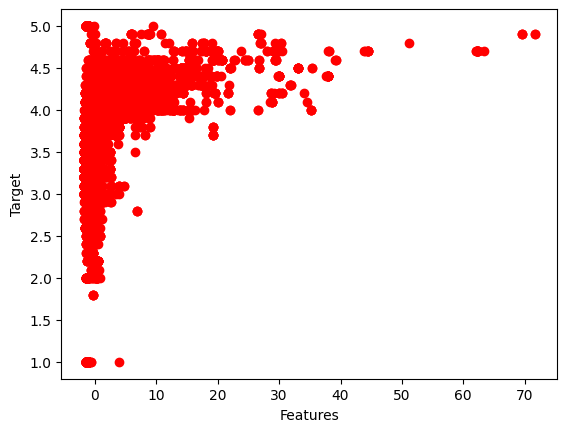

In [1496]:
pca=PCA(n_components=1)
x_train_1d=pca.fit_transform(x_train)
plt.scatter(x=x_train_1d,y=y_train,color='r')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()


# Models

## Simple LR 


In [1497]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
print(f'the Coefficient are {lr_model.coef_}')
print(f'the intercipt is {lr_model.intercept_}')

the Coefficient are [ 0.02502524  0.04473909 -0.07172044 -0.20351142  0.08420695  0.02912143
  0.01546634  0.11745581  0.02055854]
the intercipt is 4.0435898087419115


Text(0.5, 0, 'Coefficient')

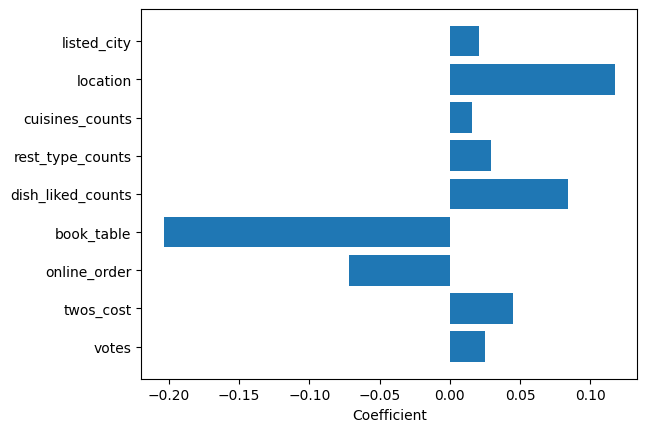

In [1498]:
plt.barh(x_train.columns,lr_model.coef_)
plt.xlabel('Coefficient')

### MSE and R Square for x_train

In [1499]:
y_pred=lr_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print(f' MSE is {mse :.3f}')
rs=r2_score(y_train,y_pred, force_finite=False)
print(f' RS is {rs * 100 :.3f}')

 MSE is 0.270
 RS is 21.018


### MSE and R Square for x_test

In [1500]:
y_predt=lr_model.predict(x_test)
mse=mean_squared_error(y_test,y_predt)
print(f' MSE is {mse :.3f}')
rs=r2_score(y_test,y_predt, force_finite=False)
print(f' RS is {rs * 100 :.3f}')

 MSE is 0.271
 RS is 20.550


### y_train vs y_pred

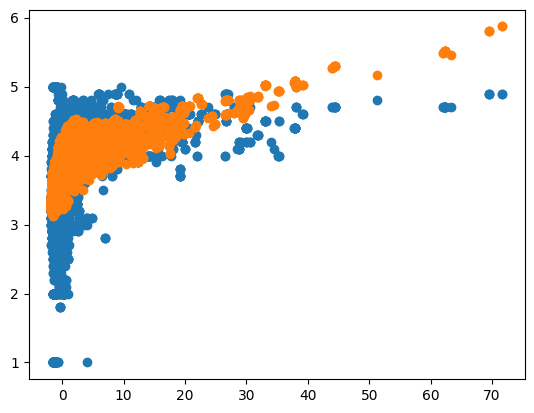

In [1501]:

plt.scatter(x_train_1d,y_train)
plt.scatter(x_train_1d,y_pred)
plt.show()

## Polynomial regression

In [1556]:
poly=PolynomialFeatures(degree=4,include_bias=False)
x_trainp=poly.fit_transform(x_train)
x_testp=poly.transform(x_test)



In [1557]:
model=LinearRegression()
model.fit(x_trainp,y_train)

LinearRegression()

In [1558]:
y_pred=model.predict(x_trainp)
print(f'MSE is {mean_squared_error(y_train,y_pred)}')
r2=r2_score(y_train,y_pred)
print(f'RS is { r2 * 100 :.3f}')

MSE is 0.23448840757370762
RS is 31.305


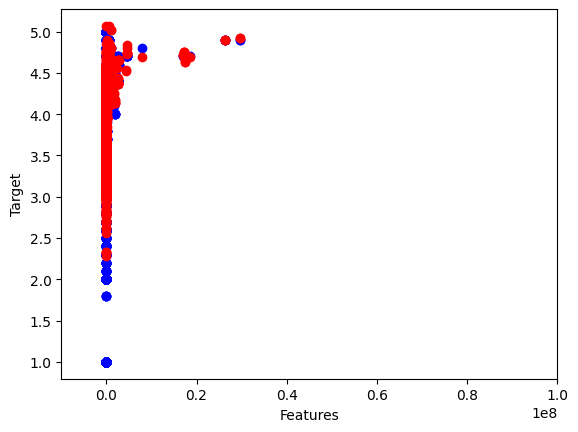

In [1559]:
pca=PCA(n_components=1)
x_train_1d=pca.fit_transform(x_trainp)
x_test_1d=pca.transform(x_testp)
plt.scatter(x=x_train_1d,y=y_train,color='b')
plt.scatter(x=x_train_1d,y=y_pred,color='r')
plt.xlim(-10000000,100000000)
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

MSE is 0.24020039184168004
RS is 29.576


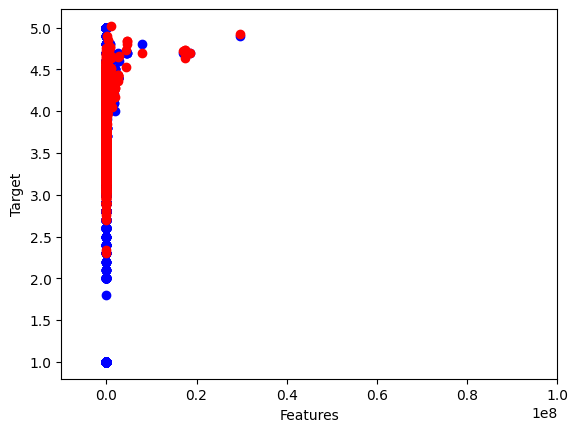

In [1560]:
y_predt=model.predict(x_testp)
print(f'MSE is {mean_squared_error(y_test,y_predt)}')
r2=r2_score(y_test,y_predt)
print(f'RS is {r2 * 100 :.3f}')

plt.scatter(x=x_test_1d,y=y_test,color='b')
plt.scatter(x=x_test_1d,y=y_predt,color='r')
plt.xlim(-10000000,100000000)
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

## Log Regression

In [1507]:
cols=x_train.columns

for col in cols:
    # x_train[col]=x_train[col]+abs(x_train[col].min())+0.000000001
    if (col =='online_order') | (col =='book_table'):
        continue
    else:
        x_train[col]=x_train[col]+abs(x_train[col].min())+0.001

x_train.describe()
    

votes     twos_cost  online_order    book_table  \
count  30916.000000  30916.000000  30916.000000  30916.000000   
mean       1.468697      1.365750      1.360267      1.857711   
std        3.754041      1.137631      0.480085      0.349352   
min        0.001000      0.001000      1.000000      1.000000   
25%        0.097386      0.651000      1.000000      2.000000   
50%        0.316444      1.026000      1.000000      2.000000   
75%        1.097386      1.651000      2.000000      2.000000   
max       73.740321     14.901000      2.000000      2.000000   

       dish_liked_counts  rest_type_counts  cuisines_counts      location  \
count       30916.000000      30916.000000     30916.000000  30916.000000   
mean            2.120631          0.153090         1.518111      2.913995   
std             0.781659          0.359113         1.288021      0.775464   
min             0.001000          0.001000         0.001000      0.001000   
25%             2.001000          0.001000         1.001000      2.358997   
50%             2.001000          0.001000         1.001000      2.710289   
75%             3.001000          0.001000         2.001000      3.358997   
max             3.001000          1.001000         7.001000      5.190503   

        listed_city  
count  30916.000000  
mean       2.209875  
std        0.722287  
min        0.001000  
25%        1.764988  
50%        2.230425  
75%        2.764988  
max        3.249868

In [1508]:

loged=pd.DataFrame(np.log(x_train).values,columns=[x+'log' for x in x_train.columns])
x_trainlog=pd.concat([x_train.reset_index(drop=True),loged],axis=1)
# x_trainlog=np.log(x_train)
# print(x_trainlog.shape)
loged

voteslog  twos_costlog  online_orderlog  book_tablelog  \
0     -0.161408      0.642380         0.000000       0.693147   
1      1.002865      2.001615         0.693147       0.693147   
2     -1.150610     -1.287354         0.693147       0.693147   
3      0.478261     -0.104250         0.000000       0.693147   
4     -0.072779     -0.104250         0.000000       0.693147   
...         ...           ...              ...            ...   
30911  1.310348      1.065056         0.000000       0.000000   
30912 -3.105288     -1.890475         0.000000       0.693147   
30913  0.819974      0.875885         0.693147       0.693147   
30914 -1.150610     -0.104250         0.693147       0.693147   
30915  2.107643      0.337186         0.000000       0.000000   

       dish_liked_countslog  rest_type_countslog  cuisines_countslog  \
0                  1.098946            -6.907755            0.693647   
1                 -6.907755            -6.907755            0.693647   
2                  0.693647            -6.907755           -6.907755   
3                  0.693647            -6.907755            0.001000   
4                  1.098946            -6.907755            0.693647   
...                     ...                  ...                 ...   
30911              1.098946            -6.907755            0.693647   
30912              0.693647            -6.907755            0.001000   
30913              1.098946            -6.907755            0.693647   
30914              0.693647            -6.907755           -6.907755   
30915              1.098946            -6.907755           -6.907755   

       locationlog  listed_citylog  
0         1.203608        0.802192  
1         1.274146        1.178614  
2         0.418954        1.077626  
3         0.782378       -0.053653  
4         1.242143        0.982217  
...            ...             ...  
30911     1.299110        0.983729  
30912     1.498986        1.077626  
30913     1.319420        1.079513  
30914     1.242143        0.982217  
30915     1.242143        1.002305  

[30916 rows x 9 columns]

### x_train + log(x_train) combination

In [1509]:
x_train_combinlog=pd.DataFrame(loged.values+x_train.reset_index(drop=True).values,columns=x_train.columns)
x_train_combinlog

votes  twos_cost  online_order  book_table  dish_liked_counts  \
0       0.689538   2.543380      1.000000    2.693147           4.099946   
1       3.728948   9.402615      2.693147    2.693147          -6.906755   
2      -0.834167  -1.011354      2.693147    2.693147           2.694647   
3       2.091529   0.796750      1.000000    2.693147           2.694647   
4       0.857027   0.796750      1.000000    2.693147           4.099946   
...          ...        ...           ...         ...                ...   
30911   5.017810   3.966056      1.000000    1.000000           4.099946   
30912  -3.060476  -1.739475      1.000000    2.693147           2.694647   
30913   3.090416   3.276885      2.693147    2.693147           4.099946   
30914  -0.834167   0.796750      2.693147    2.693147           2.694647   
30915  10.336463   1.738186      1.000000    1.000000           4.099946   

       rest_type_counts  cuisines_counts  location  listed_city  
0             -6.906755         2.694647  4.535726     3.032618  
1             -6.906755         2.694647  4.849794     4.428482  
2             -6.906755        -6.906755  1.939324     4.015325  
3             -6.906755         1.002000  2.969043     0.894108  
4             -6.906755         2.694647  4.705171     3.652588  
...                 ...              ...       ...          ...  
30911         -6.906755         2.694647  4.965144     3.658140  
30912         -6.906755         1.002000  5.976135     4.015325  
30913         -6.906755         2.694647  5.060671     4.022760  
30914         -6.906755        -6.906755  4.705171     3.652588  
30915         -6.906755        -6.906755  4.705171     3.726861  

[30916 rows x 9 columns]

### x_train * log(x_train) combination

In [1510]:
x_train_mltlog=pd.DataFrame(np.multiply(loged.values, x_train.reset_index(drop=True).values),columns=x_train.columns)
x_train_mltlog

votes  twos_cost  online_order  book_table  dish_liked_counts  \
0      -0.137349   1.221165      0.000000    1.386294           3.297936   
1       2.733894  14.813954      1.386294    1.386294          -0.006908   
2      -0.364103  -0.355310      1.386294    1.386294           1.387988   
3       0.771564  -0.093929      0.000000    1.386294           1.387988   
4      -0.067671  -0.093929      0.000000    1.386294           3.297936   
...          ...        ...           ...         ...                ...   
30911   4.858064   3.089726      0.000000    0.000000           3.297936   
30912  -0.139153  -0.285462      0.000000    1.386294           1.387988   
30913   1.861704   2.103001      1.386294    1.386294           3.297936   
30914  -0.364103  -0.093929      1.386294    1.386294           1.387988   
30915  17.343413   0.472398      0.000000    0.000000           3.297936   

       rest_type_counts  cuisines_counts  location  listed_city  
0             -0.006908         1.387988  4.010565     1.789230  
1             -0.006908         1.387988  4.555899     3.830340  
2             -0.006908        -0.006908  0.636965     3.165741  
3             -0.006908         0.001000  1.710798    -0.050850  
4             -0.006908         1.387988  4.301577     2.622884  
...                 ...              ...       ...          ...  
30911         -0.006908         1.387988  4.762582     2.630896  
30912         -0.006908         0.001000  6.711186     3.165741  
30913         -0.006908         1.387988  4.936282     3.177273  
30914         -0.006908        -0.006908  4.301577     2.622884  
30915         -0.006908        -0.006908  4.301577     2.730837  

[30916 rows x 9 columns]

In [1511]:
cols=x_test.columns

for col in cols:
    # x_test[col]=x_test[col]+abs(x_test[col].min())+0.000000001
    if (col =='online_order') | (col =='book_table'):
        continue
    else:
        x_test[col]=x_test[col]+abs(x_test[col].min())+0.001


In [1512]:
logedt=pd.DataFrame(np.log(x_test).values,columns=[x+'log' for x in x_test.columns])
x_testlog=pd.concat([x_test.reset_index(drop=True),logedt],axis=1)
# x_testlog=np.log(x_test)


### x_test + log(x_test) combination

In [1513]:
x_test_combinlog=pd.DataFrame(logedt.values+x_test.reset_index(drop=True).values,columns=x_test.columns)
x_test_combinlog

votes  twos_cost  online_order  book_table  dish_liked_counts  \
0      34.956105   4.625070      1.000000    1.000000           4.099946   
1      -2.048694  -0.512794      1.000000    2.693147           2.694647   
2       1.867770   0.221754      1.000000    2.693147           4.099946   
3      -3.286819   1.291631      2.693147    2.693147           2.694647   
4      -0.852490   0.221754      2.693147    2.693147           2.694647   
...          ...        ...           ...         ...                ...   
13245  -2.962816   0.221754      1.000000    2.693147           2.694647   
13246  -2.136774   1.738186      1.000000    2.693147           2.694647   
13247   2.886481   2.152381      1.000000    2.693147           4.099946   
13248   2.218115   1.291631      1.000000    2.693147           4.099946   
13249   4.321863   3.276885      1.000000    1.000000           4.099946   

       rest_type_counts  cuisines_counts  location  listed_city  
0              1.002000         2.694647  3.947204     1.391539  
1              1.002000         4.099946  4.535726     2.867529  
2             -6.906755         1.002000  4.535726     2.867529  
3             -6.906755         2.694647  3.051968     3.658140  
4             -6.906755         1.002000  3.217233     3.934526  
...                 ...              ...       ...          ...  
13245         -6.906755        -6.906755  3.217233     3.652588  
13246         -6.906755         4.099946  5.976135     3.652588  
13247         -6.906755         5.387544  5.928688     4.022760  
13248         -6.906755         2.694647  2.906904     0.431960  
13249         -6.906755         4.099946  4.437703     4.022760  

[13250 rows x 9 columns]

### x_test * log(x_test) combination

In [1514]:
x_test_mltlog=pd.DataFrame(np.multiply(logedt.values,x_test.reset_index(drop=True).values),columns=x_test.columns)
x_test_mltlog

votes  twos_cost  online_order  book_table  dish_liked_counts  \
0      108.700991   4.163060      0.000000    0.000000           3.297936   
1       -0.248620  -0.366431      0.000000    1.386294           1.387988   
2        0.576677  -0.279439      0.000000    1.386294           3.297936   
3       -0.119787   0.161866      1.386294    1.386294           1.387988   
4       -0.363413  -0.279439      1.386294    1.386294           1.387988   
...           ...        ...           ...         ...                ...   
13245   -0.148169  -0.279439      0.000000    1.386294           1.387988   
13246   -0.238081   0.472398      0.000000    1.386294           1.387988   
13247    1.610969   0.827780      0.000000    1.386294           3.297936   
13248    0.890037   0.161866      0.000000    1.386294           3.297936   
13249    3.654270   2.103001      0.000000    0.000000           3.297936   

       rest_type_counts  cuisines_counts  location  listed_city  
0              0.001000         1.387988  3.060827     0.224746  
1              0.001000         3.297936  4.010565     1.588379  
2             -0.006908         0.001000  4.010565     1.588379  
3             -0.006908         1.387988  1.813370     2.630896  
4             -0.006908         0.001000  2.024577     3.041452  
...                 ...              ...       ...          ...  
13245         -0.006908        -0.006908  2.024577     2.622884  
13246         -0.006908         3.297936  6.711186     2.622884  
13247         -0.006908         5.547564  6.614509     3.177273  
13248         -0.006908         1.387988  1.635449    -0.224871  
13249         -0.006908         3.297936  3.845714     3.177273  

[13250 rows x 9 columns]

In [1515]:
x_testlog

votes  twos_cost  online_order  book_table  dish_liked_counts  \
0      31.505929      3.401             1           1              3.001   
1       0.114910      0.401             1           2              2.001   
2       1.477451      0.651             1           2              3.001   
3       0.036049      1.151             2           2              2.001   
4       0.312062      0.651             2           2              2.001   
...          ...        ...           ...         ...                ...   
13245   0.049193      0.651             1           2              2.001   
13246   0.106148      1.401             1           2              2.001   
13247   2.130244      1.651             1           2              3.001   
13248   1.692128      1.151             1           2              3.001   
13249   3.168579      2.401             1           1              3.001   

       rest_type_counts  cuisines_counts  location  listed_city  voteslog  \
0                 1.001            2.001  2.886989     1.205032  3.450176   
1                 1.001            3.001  3.332118     2.117360 -2.163604   
2                 0.001            1.001  3.332118     2.117360  0.390318   
3                 0.001            2.001  2.243798     2.674411 -3.322868   
4                 0.001            1.001  2.358997     2.877577 -1.164552   
...                 ...              ...       ...          ...       ...   
13245             0.001            0.001  2.358997     2.670371 -3.012009   
13246             0.001            3.001  4.477149     2.670371 -2.242922   
13247             0.001            4.001  4.438395     2.943246  0.756237   
13248             0.001            2.001  2.144157     0.737054  0.525987   
13249             0.001            3.001  3.256921     2.943246  1.153283   

       twos_costlog  online_orderlog  book_tablelog  dish_liked_countslog  \
0          1.224070         0.000000       0.000000              1.098946   
1         -0.913794         0.000000       0.693147              0.693647   
2         -0.429246         0.000000       0.693147              1.098946   
3          0.140631         0.693147       0.693147              0.693647   
4         -0.429246         0.693147       0.693147              0.693647   
...             ...              ...            ...                   ...   
13245     -0.429246         0.000000       0.693147              0.693647   
13246      0.337186         0.000000       0.693147              0.693647   
13247      0.501381         0.000000       0.693147              1.098946   
13248      0.140631         0.000000       0.693147              1.098946   
13249      0.875885         0.000000       0.000000              1.098946   

       rest_type_countslog  cuisines_countslog  locationlog  listed_citylog  
0                 0.001000            0.693647     1.060214        0.186507  
1                 0.001000            1.098946     1.203608        0.750170  
2                -6.907755            0.001000     1.203608        0.750170  
3                -6.907755            0.693647     0.808170        0.983729  
4                -6.907755            0.001000     0.858236        1.056949  
...                    ...                 ...          ...             ...  
13245            -6.907755           -6.907755     0.858236        0.982217  
13246            -6.907755            1.098946     1.498986        0.982217  
13247            -6.907755            1.386544     1.490293        1.079513  
13248            -6.907755            0.693647     0.762747       -0.305094  
13249            -6.907755            1.098946     1.180782        1.079513  

[13250 rows x 18 columns]

In [1516]:
modellog= LinearRegression()
modellog.fit(x_trainlog,y_train)
print(modellog.coef_)
print(modellog.intercept_)
x_testlog

[ 0.00200263  0.06354948 -0.00343648 -0.08174714  0.08427069  0.00084701
  0.00968722  0.07462286  0.02000787  0.11882959 -0.09606493 -0.00238199
 -0.0566628  -0.02484017  0.00585178 -0.00255679  0.04562675  0.00162346]
3.429907125937956


votes  twos_cost  online_order  book_table  dish_liked_counts  \
0      31.505929      3.401             1           1              3.001   
1       0.114910      0.401             1           2              2.001   
2       1.477451      0.651             1           2              3.001   
3       0.036049      1.151             2           2              2.001   
4       0.312062      0.651             2           2              2.001   
...          ...        ...           ...         ...                ...   
13245   0.049193      0.651             1           2              2.001   
13246   0.106148      1.401             1           2              2.001   
13247   2.130244      1.651             1           2              3.001   
13248   1.692128      1.151             1           2              3.001   
13249   3.168579      2.401             1           1              3.001   

       rest_type_counts  cuisines_counts  location  listed_city  voteslog  \
0                 1.001            2.001  2.886989     1.205032  3.450176   
1                 1.001            3.001  3.332118     2.117360 -2.163604   
2                 0.001            1.001  3.332118     2.117360  0.390318   
3                 0.001            2.001  2.243798     2.674411 -3.322868   
4                 0.001            1.001  2.358997     2.877577 -1.164552   
...                 ...              ...       ...          ...       ...   
13245             0.001            0.001  2.358997     2.670371 -3.012009   
13246             0.001            3.001  4.477149     2.670371 -2.242922   
13247             0.001            4.001  4.438395     2.943246  0.756237   
13248             0.001            2.001  2.144157     0.737054  0.525987   
13249             0.001            3.001  3.256921     2.943246  1.153283   

       twos_costlog  online_orderlog  book_tablelog  dish_liked_countslog  \
0          1.224070         0.000000       0.000000              1.098946   
1         -0.913794         0.000000       0.693147              0.693647   
2         -0.429246         0.000000       0.693147              1.098946   
3          0.140631         0.693147       0.693147              0.693647   
4         -0.429246         0.693147       0.693147              0.693647   
...             ...              ...            ...                   ...   
13245     -0.429246         0.000000       0.693147              0.693647   
13246      0.337186         0.000000       0.693147              0.693647   
13247      0.501381         0.000000       0.693147              1.098946   
13248      0.140631         0.000000       0.693147              1.098946   
13249      0.875885         0.000000       0.000000              1.098946   

       rest_type_countslog  cuisines_countslog  locationlog  listed_citylog  
0                 0.001000            0.693647     1.060214        0.186507  
1                 0.001000            1.098946     1.203608        0.750170  
2                -6.907755            0.001000     1.203608        0.750170  
3                -6.907755            0.693647     0.808170        0.983729  
4                -6.907755            0.001000     0.858236        1.056949  
...                    ...                 ...          ...             ...  
13245            -6.907755           -6.907755     0.858236        0.982217  
13246            -6.907755            1.098946     1.498986        0.982217  
13247            -6.907755            1.386544     1.490293        1.079513  
13248            -6.907755            0.693647     0.762747       -0.305094  
13249            -6.907755            1.098946     1.180782        1.079513  

[13250 rows x 18 columns]

0.24890807190889183
RS is 29.573


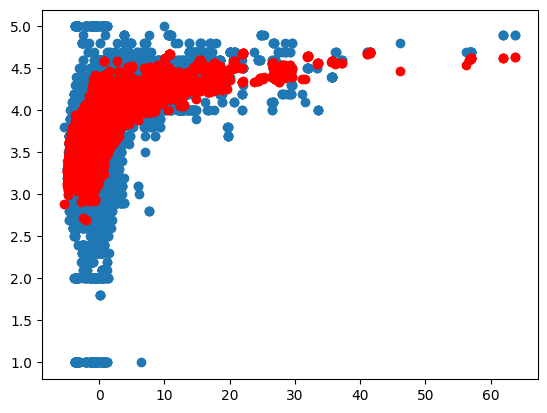

In [1517]:

pca=PCA(n_components=1)
x_trainlog1d=pca.fit_transform(x_trainlog)
x_testlog1d=pca.transform(x_testlog)
y_predict=modellog.predict(x_trainlog)
print(mean_squared_error(y_train,y_predict))
r2_score(y_train,y_predict)
print(f'RS is {r2 * 100 :.3f}')

plt.scatter(x_trainlog1d,y_train)
plt.scatter(x_trainlog1d,y_predict,color='r')

0.2494767377697781
RS is 26.856


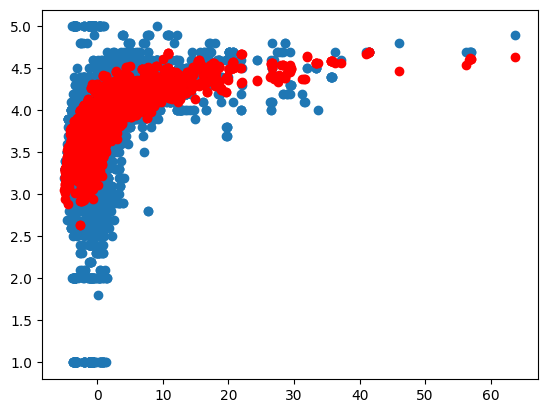

In [1518]:
y_predictt=modellog.predict(x_testlog)
print(mean_squared_error(y_test,y_predictt))
r2=r2_score(y_test,y_predictt)
print(f'RS is {r2 * 100 :.3f}')

plt.scatter(x_testlog1d,y_test)
plt.scatter(x_testlog1d,y_predictt,color='r')

## x + log(x) combination

In [1519]:
x_train_combinlog

votes  twos_cost  online_order  book_table  dish_liked_counts  \
0       0.689538   2.543380      1.000000    2.693147           4.099946   
1       3.728948   9.402615      2.693147    2.693147          -6.906755   
2      -0.834167  -1.011354      2.693147    2.693147           2.694647   
3       2.091529   0.796750      1.000000    2.693147           2.694647   
4       0.857027   0.796750      1.000000    2.693147           4.099946   
...          ...        ...           ...         ...                ...   
30911   5.017810   3.966056      1.000000    1.000000           4.099946   
30912  -3.060476  -1.739475      1.000000    2.693147           2.694647   
30913   3.090416   3.276885      2.693147    2.693147           4.099946   
30914  -0.834167   0.796750      2.693147    2.693147           2.694647   
30915  10.336463   1.738186      1.000000    1.000000           4.099946   

       rest_type_counts  cuisines_counts  location  listed_city  
0             -6.906755         2.694647  4.535726     3.032618  
1             -6.906755         2.694647  4.849794     4.428482  
2             -6.906755        -6.906755  1.939324     4.015325  
3             -6.906755         1.002000  2.969043     0.894108  
4             -6.906755         2.694647  4.705171     3.652588  
...                 ...              ...       ...          ...  
30911         -6.906755         2.694647  4.965144     3.658140  
30912         -6.906755         1.002000  5.976135     4.015325  
30913         -6.906755         2.694647  5.060671     4.022760  
30914         -6.906755        -6.906755  4.705171     3.652588  
30915         -6.906755        -6.906755  4.705171     3.726861  

[30916 rows x 9 columns]

In [1520]:
modellogcom= LinearRegression()
modellogcom.fit(x_train_combinlog,y_train)
print(modellogcom.coef_)
print(modellogcom.intercept_)


[ 0.03174614  0.01877811 -0.02967819 -0.11654542  0.00887985  0.00348912
  0.00187367  0.08151972  0.00909164]
3.6018546939482903


0.2645262144366036
RS is 22.505


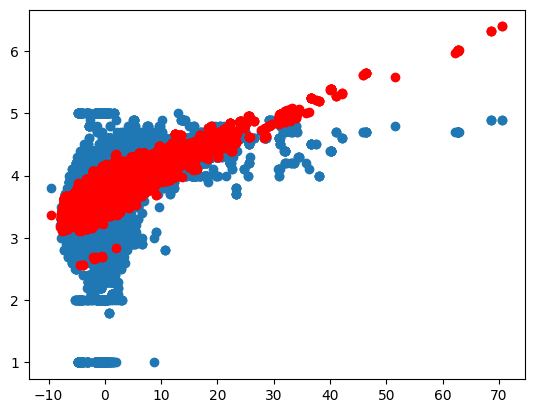

In [1521]:

pca1=PCA(n_components=1)
x_train_combinlog1d=pca1.fit_transform(x_train_combinlog)
x_test_combinlog1d=pca1.transform(x_test_combinlog)
y_predict=modellogcom.predict(x_train_combinlog)
print(mean_squared_error(y_train,y_predict))
r2=r2_score(y_train,y_predict)
print(f'RS is {r2 * 100 :.3f}')

plt.scatter(x_train_combinlog1d,y_train)
plt.scatter(x_train_combinlog1d,y_predict,color='r')

0.2664270390810165
RS is 21.886


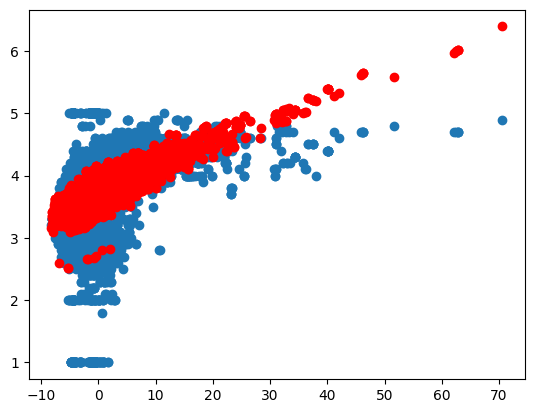

In [1522]:
y_predictt=modellogcom.predict(x_test_combinlog)
print(mean_squared_error(y_test,y_predictt))

r2=r2_score(y_test,y_predictt)
print(f'RS is {r2 * 100 :.3f}')


plt.scatter(x_test_combinlog1d,y_test)
plt.scatter(x_test_combinlog1d,y_predictt,color='r')

## x * log(x) combination

In [1523]:
x_train_mltlog

votes  twos_cost  online_order  book_table  dish_liked_counts  \
0      -0.137349   1.221165      0.000000    1.386294           3.297936   
1       2.733894  14.813954      1.386294    1.386294          -0.006908   
2      -0.364103  -0.355310      1.386294    1.386294           1.387988   
3       0.771564  -0.093929      0.000000    1.386294           1.387988   
4      -0.067671  -0.093929      0.000000    1.386294           3.297936   
...          ...        ...           ...         ...                ...   
30911   4.858064   3.089726      0.000000    0.000000           3.297936   
30912  -0.139153  -0.285462      0.000000    1.386294           1.387988   
30913   1.861704   2.103001      1.386294    1.386294           3.297936   
30914  -0.364103  -0.093929      1.386294    1.386294           1.387988   
30915  17.343413   0.472398      0.000000    0.000000           3.297936   

       rest_type_counts  cuisines_counts  location  listed_city  
0             -0.006908         1.387988  4.010565     1.789230  
1             -0.006908         1.387988  4.555899     3.830340  
2             -0.006908        -0.006908  0.636965     3.165741  
3             -0.006908         0.001000  1.710798    -0.050850  
4             -0.006908         1.387988  4.301577     2.622884  
...                 ...              ...       ...          ...  
30911         -0.006908         1.387988  4.762582     2.630896  
30912         -0.006908         0.001000  6.711186     3.165741  
30913         -0.006908         1.387988  4.936282     3.177273  
30914         -0.006908        -0.006908  4.301577     2.622884  
30915         -0.006908        -0.006908  4.301577     2.730837  

[30916 rows x 9 columns]

In [1524]:
modellogcom= LinearRegression()
modellogcom.fit(x_train_mltlog,y_train)
print(modellogcom.coef_)
print(modellogcom.intercept_)


[ 0.00465683  0.02206676 -0.05114087 -0.14800567  0.0991044   4.40992188
  0.0099766   0.0544775   0.01098553]
3.470144662119815


0.26851383932595363
RS is 21.337


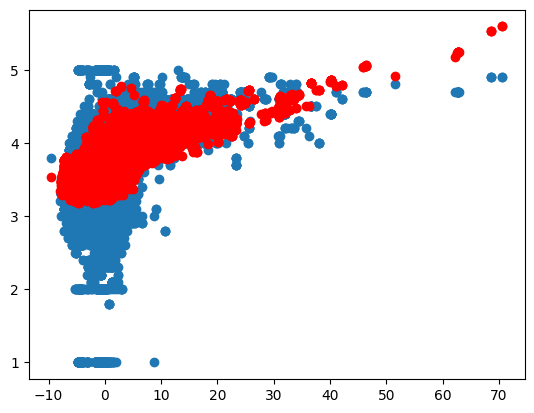

In [1525]:

pca1=PCA(n_components=1)
x_train_mltlog1d=pca1.fit_transform(x_train_mltlog)
x_test_mltlog1d=pca1.transform(x_test_mltlog)
y_predict=modellogcom.predict(x_train_mltlog)
print(mean_squared_error(y_train,y_predict))
r2=r2_score(y_train,y_predict)
print(f'RS is {r2 * 100 :.3f}')

plt.scatter(x_train_combinlog1d,y_train)
plt.scatter(x_train_combinlog1d,y_predict,color='r')

0.2688171725138968
RS is 21.185


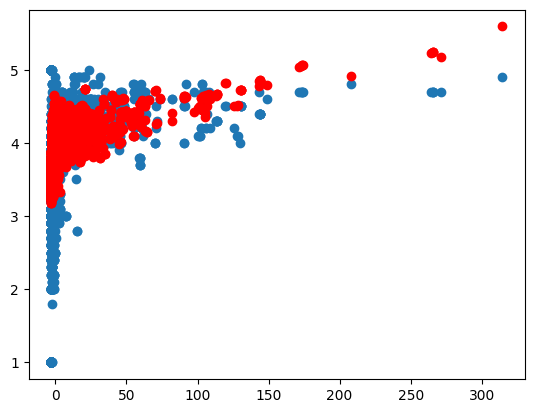

In [1526]:
y_predictt=modellogcom.predict(x_test_mltlog)
print(mean_squared_error(y_test,y_predictt))
r2=r2_score(y_test,y_predictt)
print(f'RS is {r2 * 100 :.3f}')
plt.scatter(x_test_mltlog1d,y_test)
plt.scatter(x_test_mltlog1d,y_predictt,color='r')

## Poly x + Log(x) combination

In [1527]:
poly=PolynomialFeatures(degree=3,include_bias=False)
x_trainlogpoly=poly.fit_transform(x_train_combinlog)
x_testlogpoly=poly.transform(x_test_combinlog)


In [1528]:
model=LinearRegression()
model.fit(x_trainlogpoly,y_train)

LinearRegression()

In [1529]:
y_pred=model.predict(x_trainlogpoly)
print(f'MSE is {mean_squared_error(y_train,y_pred)}')
r2=r2_score(y_train,y_pred)
print(f'RS is {r2 * 100 :.3f}')

# y_predt=model.predict(x_testp)
# print(f'MSE is {mean_squared_error(y_test,y_predt)}')
# print(f'RS is {r2_score(y_test,y_predt)}')

MSE is 0.2418528650378835
RS is 29.148


In [1530]:
y_predt=model.predict(x_testlogpoly)
print(f'MSE is {mean_squared_error(y_test,y_predt)}')
r2=r2_score(y_test,y_predt)
print(f'RS is {r2 * 100 :.3f}')

MSE is 0.24427587921858865
RS is 28.381


## Poly x * Log(x) combination

In [1531]:
poly=PolynomialFeatures(degree=4,include_bias=False)
x_trainlogpoly=poly.fit_transform(x_train_mltlog)
x_testlogpoly=poly.transform(x_test_mltlog)


In [1532]:
model=LinearRegression()
model.fit(x_trainlogpoly,y_train)

LinearRegression()

In [1533]:
y_pred=model.predict(x_trainlogpoly)
print(f'MSE is {mean_squared_error(y_train,y_pred)}')
r2=r2_score(y_train,y_pred)
print(f'RS is {r2 * 100 :.3f}')
# y_predt=model.predict(x_testp)
# print(f'MSE is {mean_squared_error(y_test,y_predt)}')
# print(f'RS is {r2_score(y_test,y_predt)}')

MSE is 0.23806366197682685
RS is 30.258


In [1534]:
y_predt=model.predict(x_testlogpoly)
print(f'MSE is {mean_squared_error(y_test,y_predt)}')
r2=r2_score(y_test,y_predt)
print(f'RS is {r2 * 100 :.3f}')

MSE is 0.2436392751054016
RS is 28.567


## Poly Log Regression

In [1539]:
poly=PolynomialFeatures(degree=2,include_bias=False)
x_trainlogpoly=poly.fit_transform(x_trainlog)
x_testlogpoly=poly.transform(x_testlog)


In [1540]:
model=LinearRegression()
model.fit(x_trainlogpoly,y_train)

LinearRegression()

In [1541]:
y_pred=model.predict(x_trainlogpoly)
print(f'MSE is {mean_squared_error(y_train,y_pred)}')
r2=r2_score(y_train,y_pred)
print(f'RS is {r2 * 100 :.3f}')
# y_predt=model.predict(x_testp)
# print(f'MSE is {mean_squared_error(y_test,y_predt)}')
# print(f'RS is {r2_score(y_test,y_predt)}')

MSE is 0.24135129710794867
RS is 29.294


In [1542]:
y_predt=model.predict(x_testlogpoly)
print(f'MSE is {mean_squared_error(y_test,y_predt)}')
r2=r2_score(y_test,y_predt)
print(f'RS is {r2 * 100 :.3f}')

MSE is 0.2435061233588386
RS is 28.606
